<a href="https://colab.research.google.com/github/IAMDSVSSANGRAL/classificationcapestone/blob/main/Cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/IAMDSVSSANGRAL/classificationcapestone

# **Problem Statement**


The objective of this project is to develop a machine learning model that can predict whether a patient is at risk of developing coronary heart disease (CHD) within the next 10 years. The dataset used for this project contains records of over 4,000 patients from an ongoing cardiovascular study in Framingham, Massachusetts. Each record consists of 15 attributes, including demographic, behavioral, and medical risk factors.

The primary task is binary classification, where the target variable is "TenYearCHD," indicating whether a patient is at risk of CHD (1) or not (0). The features include attributes such as age, sex, education level, smoking status, blood pressure measurements, cholesterol levels, and more. The dataset may also contain missing values that need to be handled appropriately.

By building an accurate predictive model, this project aims to assist healthcare professionals in identifying individuals at higher risk of CHD, allowing for early intervention and tailored healthcare recommendations to reduce the incidence of cardiovascular diseases.

Key objectives for the project include data preprocessing, feature engineering, model selection, hyperparameter tuning, and evaluating the model's performance using appropriate metrics. The success of this project will be measured by the model's ability to predict CHD risk with a high degree of accuracy and reliability.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [336]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [337]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

#assinging the path
path = "/content/drive/MyDrive/Santa/classification - capestone/data_cardiovascular_risk.csv"

#read data from a CSV file into a DataFrame.
data_raw = pd.read_csv(path)

#create a copy of raw data
df = data_raw.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [338]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### Dataset Rows & Columns count

In [339]:
# Dataset Rows & Columns count
rows, columns = df.shape

# Print the number of rows and columns
print("Number of Rows:", rows)
print("Number of Columns:", columns)

Number of Rows: 3390
Number of Columns: 17


### Dataset Information

In [340]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [341]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()

# Print the count of duplicate values
print("Duplicate Value Count:", duplicate_count)


Duplicate Value Count: 0


#### Missing Values/Null Values

In [342]:
# Missing Values/Null Values Count
missing_values_count = df.isnull().sum()

# Print the count of missing values for each column
print("Missing Values Count:")
print(missing_values_count)


Missing Values Count:
id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


In [343]:
!pip install missingno

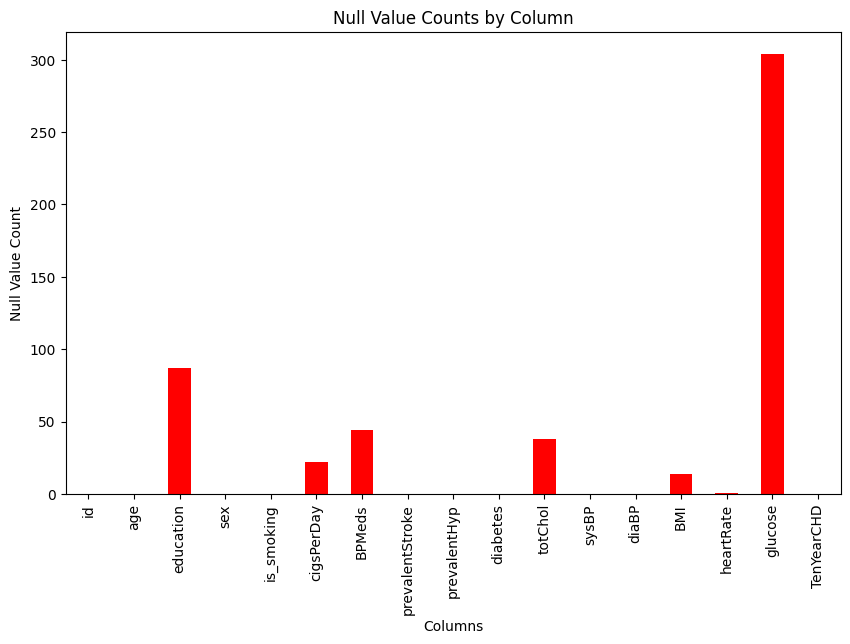

In [344]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
missing_values_count.plot(kind='bar', color='red')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.title('Null Value Counts by Column')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
plt.show()

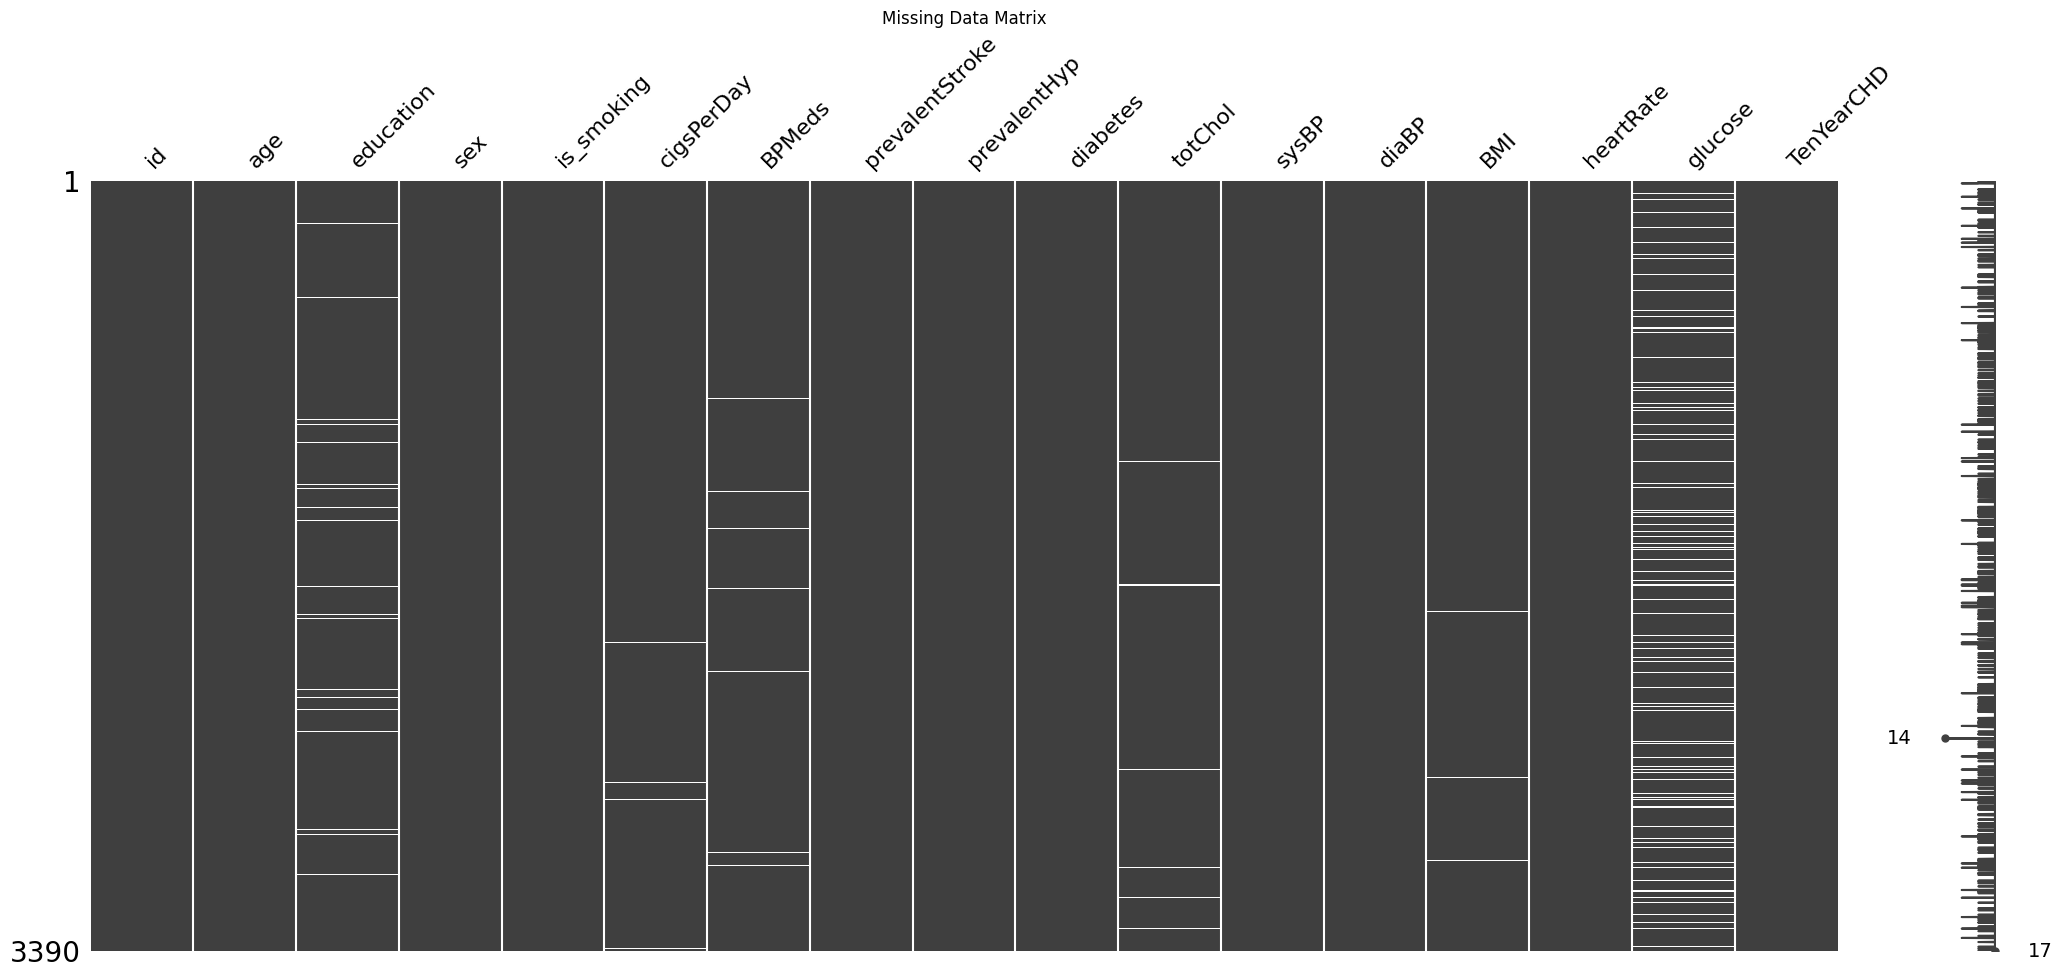

In [345]:
# Visualizing the missing values
# Create a missing data matrix visualization
msno.matrix(df)
plt.title('Missing Data Matrix')
plt.show()

### What did you know about your dataset?

There are several insights that can be gathered from the information provided about your dataset:

1. **Number of Entries:**
   - The dataset contains 3,390 entries.

2. **Columns and Data Types:**
   - There are 17 columns in the dataset.
   - The data types include integers (`int64`), floats (`float64`), and objects (`object`).

3. **Missing Values:**
   - Some columns have missing values (non-null counts are less than the total number of entries).
   - Columns with missing values include 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose'.

4. **Categorical Columns:**
   - 'sex' and 'is_smoking' are categorical columns represented as objects. You may want to check the unique values in these columns and potentially convert them to numerical values if needed.

5. **Numerical Columns:**
   - Columns such as 'age', 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose' are numerical.

6. **Target Variable:**
   - 'TenYearCHD' is the target variable for binary classification, indicating whether a patient is at risk of CHD in the next 10 years.

7. **Summary Statistics:**
   - Descriptive statistics such as mean, standard deviation, minimum, and maximum are not provided, but calculating these would be useful for understanding the distribution of numerical features.

8. **Potential Preprocessing Steps:**
   - Imputation: Consider imputing missing values for columns like 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose'.
   - Categorical Encoding: Convert categorical columns ('sex' and 'is_smoking') into numerical format, possibly using one-hot encoding or label encoding.
   - Feature Scaling: Depending on the algorithms you plan to use, consider scaling numerical features.

These initial insights provide a foundation for further exploration and preprocessing of the dataset. You can visualize the distribution of numerical features, explore relationships between variables, and handle missing values before building and training your machine learning model.

## ***2. Understanding Your Variables***

In [346]:
# Assuming data_raw is your DataFrame
columns_list = df.columns

# Print the list of columns
print("Dataset Columns:")
print(columns_list)

Dataset Columns:
Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [347]:
# Dataset Describe
df.describe(include="all").T

count unique  top  freq        mean         std    min  \
id               3390.0    NaN  NaN   NaN      1694.5  978.753033    0.0   
age              3390.0    NaN  NaN   NaN   49.542183    8.592878   32.0   
education        3303.0    NaN  NaN   NaN    1.970936    1.019081    1.0   
sex                3390      2    F  1923         NaN         NaN    NaN   
is_smoking         3390      2   NO  1703         NaN         NaN    NaN   
cigsPerDay       3368.0    NaN  NaN   NaN    9.069477   11.879078    0.0   
BPMeds           3346.0    NaN  NaN   NaN    0.029886    0.170299    0.0   
prevalentStroke  3390.0    NaN  NaN   NaN     0.00649    0.080309    0.0   
prevalentHyp     3390.0    NaN  NaN   NaN    0.315339    0.464719    0.0   
diabetes         3390.0    NaN  NaN   NaN    0.025664    0.158153    0.0   
totChol          3352.0    NaN  NaN   NaN  237.074284    45.24743  107.0   
sysBP            3390.0    NaN  NaN   NaN   132.60118    22.29203   83.5   
diaBP            3390.0    NaN  NaN   NaN   82.883038   12.023581   48.0   
BMI              3376.0    NaN  NaN   NaN   25.794964    4.115449  15.96   
heartRate        3389.0    NaN  NaN   NaN   75.977279   11.971868   45.0   
glucose          3086.0    NaN  NaN   NaN    82.08652   24.244753   40.0   
TenYearCHD       3390.0    NaN  NaN   NaN    0.150737    0.357846    0.0   

                    25%     50%      75%     max  
id               847.25  1694.5  2541.75  3389.0  
age                42.0    49.0     56.0    70.0  
education           1.0     2.0      3.0     4.0  
sex                 NaN     NaN      NaN     NaN  
is_smoking          NaN     NaN      NaN     NaN  
cigsPerDay          0.0     0.0     20.0    70.0  
BPMeds              0.0     0.0      0.0     1.0  
prevalentStroke     0.0     0.0      0.0     1.0  
prevalentHyp        0.0     0.0      1.0     1.0  
diabetes            0.0     0.0      0.0     1.0  
totChol           206.0   234.0    264.0   696.0  
sysBP             117.0   128.5    144.0   295.0  
diaBP              74.5    82.0     90.0   142.5  
BMI               23.02   25.38    28.04    56.8  
heartRate          68.0    75.0     83.0   143.0  
glucose            71.0    78.0     87.0   394.0  
TenYearCHD          0.0     0.0      0.0     1.0

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [348]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values in column "{column}":')
    print(unique_values)
    print('\n')

Unique values in column "id":
[   0    1    2 ... 3387 3388 3389]


Unique values in column "age":
[64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]


Unique values in column "education":
[ 2.  4.  1.  3. nan]


Unique values in column "sex":
['F' 'M']


Unique values in column "is_smoking":
['YES' 'NO']


Unique values in column "cigsPerDay":
[ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]


Unique values in column "BPMeds":
[ 0. nan  1.]


Unique values in column "prevalentStroke":
[0 1]


Unique values in column "prevalentHyp":
[0 1]


Unique values in column "diabetes":
[0 1]


Unique values in column "totChol":
[221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [349]:
# Assuming data_raw is your DataFrame
columns_to_drop = ['id']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Display the first few rows of the cleaned DataFrame
df.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [350]:
!pip install dataprep

In [351]:
from dataprep.eda import create_report
report = create_report(df)

DataPrep Report
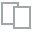
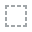
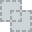
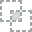
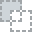
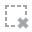
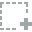
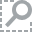
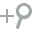
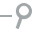
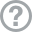
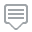
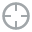
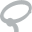
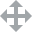
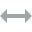
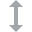
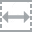
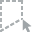
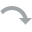
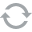
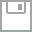
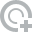
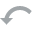
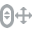
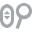
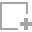
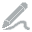
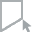
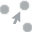
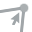
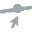

In [352]:
report

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


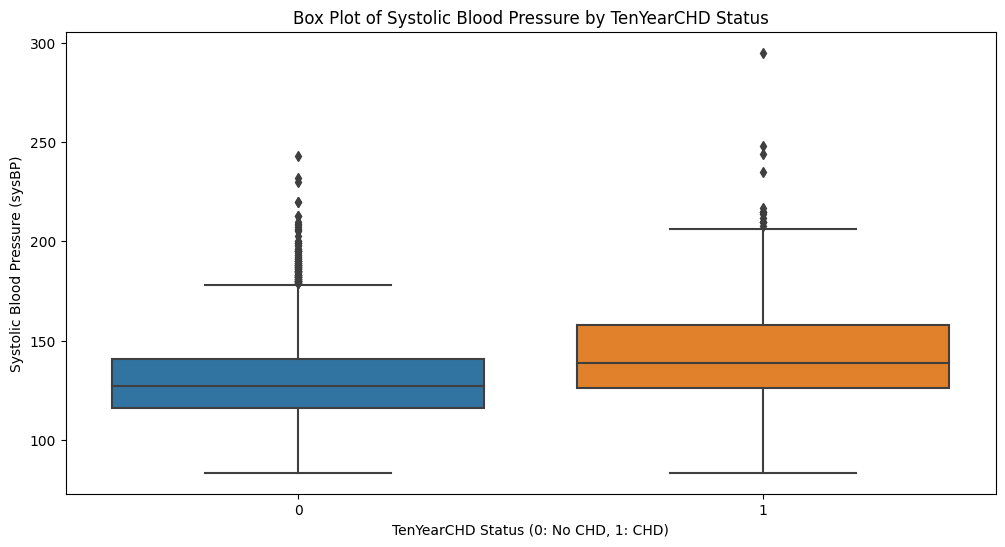

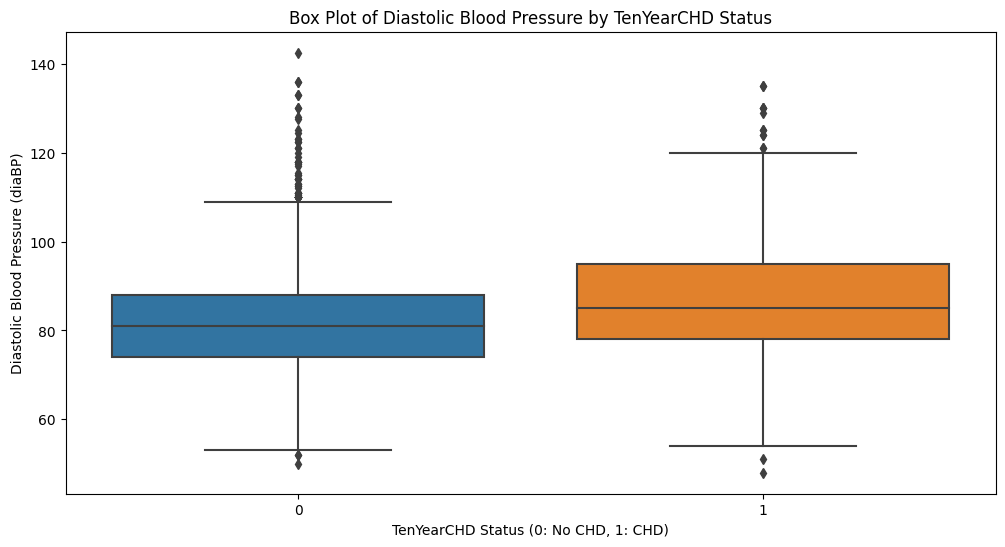

In [354]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Systolic Blood Pressure (sysBP)
plt.figure(figsize=(12, 6))
sns.boxplot(x='TenYearCHD', y='sysBP', data=df)
plt.title('Box Plot of Systolic Blood Pressure by TenYearCHD Status')
plt.xlabel('TenYearCHD Status (0: No CHD, 1: CHD)')
plt.ylabel('Systolic Blood Pressure (sysBP)')
plt.show()

# Box plot for Diastolic Blood Pressure (diaBP)
plt.figure(figsize=(12, 6))
sns.boxplot(x='TenYearCHD', y='diaBP', data=df)
plt.title('Box Plot of Diastolic Blood Pressure by TenYearCHD Status')
plt.xlabel('TenYearCHD Status (0: No CHD, 1: CHD)')
plt.ylabel('Diastolic Blood Pressure (diaBP)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

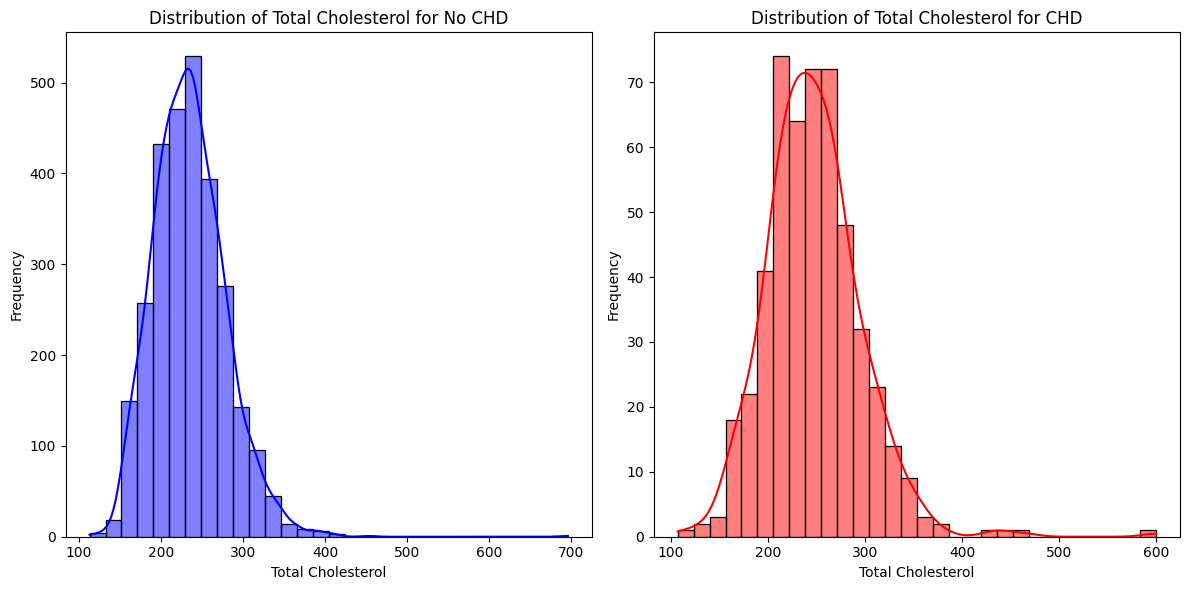

In [355]:
# Chart - 2 visualization code
# Set up the figure with subplots
plt.figure(figsize=(12, 6))

# Plot histogram for CHD = 0 (No CHD)
plt.subplot(1, 2, 1)
sns.histplot(df[df['TenYearCHD'] == 0]['totChol'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Cholesterol for No CHD')
plt.xlabel('Total Cholesterol')
plt.ylabel('Frequency')

# Plot histogram for CHD = 1 (With CHD)
plt.subplot(1, 2, 2)
sns.histplot(df[df['TenYearCHD'] == 1]['totChol'], bins=30, kde=True, color='red')
plt.title('Distribution of Total Cholesterol for CHD')
plt.xlabel('Total Cholesterol')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

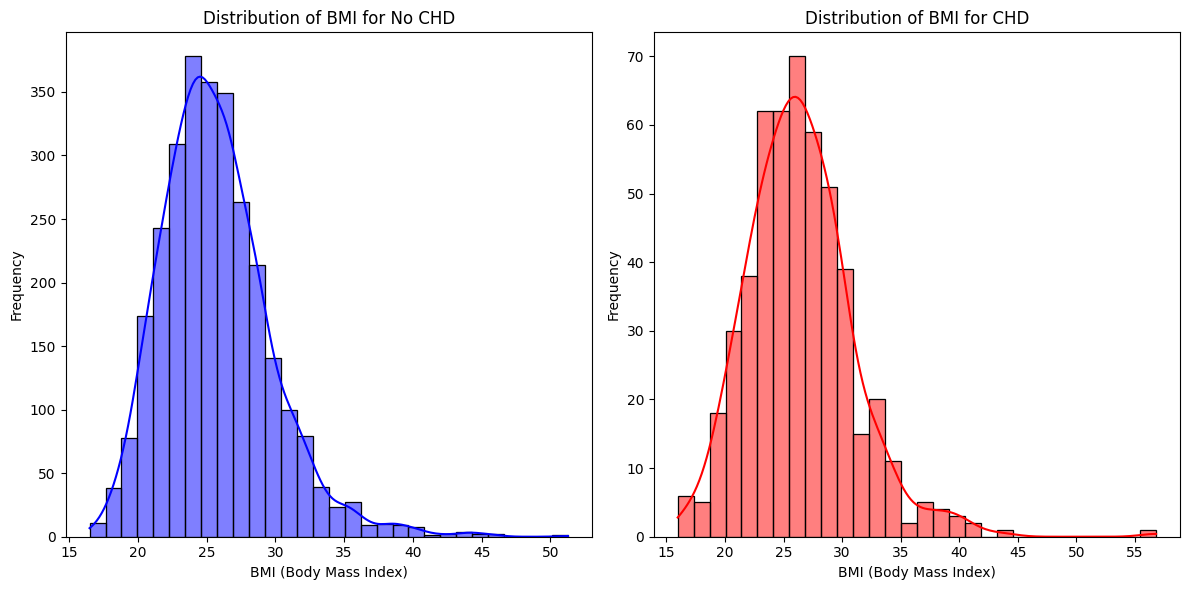

In [356]:
# Chart - 3 visualization code
# Set up the figure with subplots
plt.figure(figsize=(12, 6))

# Plot histogram for CHD = 0 (No CHD)
plt.subplot(1, 2, 1)
sns.histplot(df[df['TenYearCHD'] == 0]['BMI'], bins=30, kde=True, color='blue')
plt.title('Distribution of BMI for No CHD')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Frequency')

# Plot histogram for CHD = 1 (With CHD)
plt.subplot(1, 2, 2)
sns.histplot(df[df['TenYearCHD'] == 1]['BMI'], bins=30, kde=True, color='red')
plt.title('Distribution of BMI for CHD')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

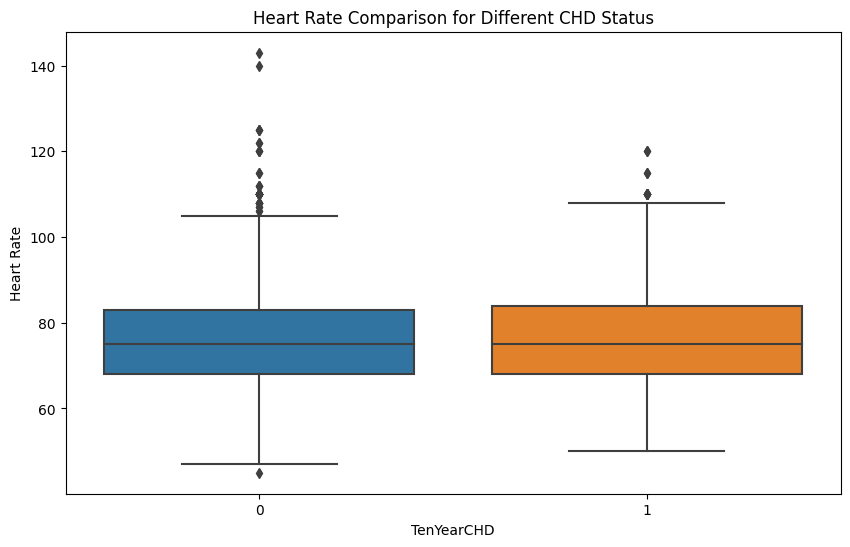

In [357]:
# Chart - 4 visualization code
# Set up the figure with subplots
plt.figure(figsize=(10, 6))

# Box plot for heart rates based on CHD status
sns.boxplot(x='TenYearCHD', y='heartRate', data=df)
plt.title('Heart Rate Comparison for Different CHD Status')
plt.xlabel('TenYearCHD')
plt.ylabel('Heart Rate')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

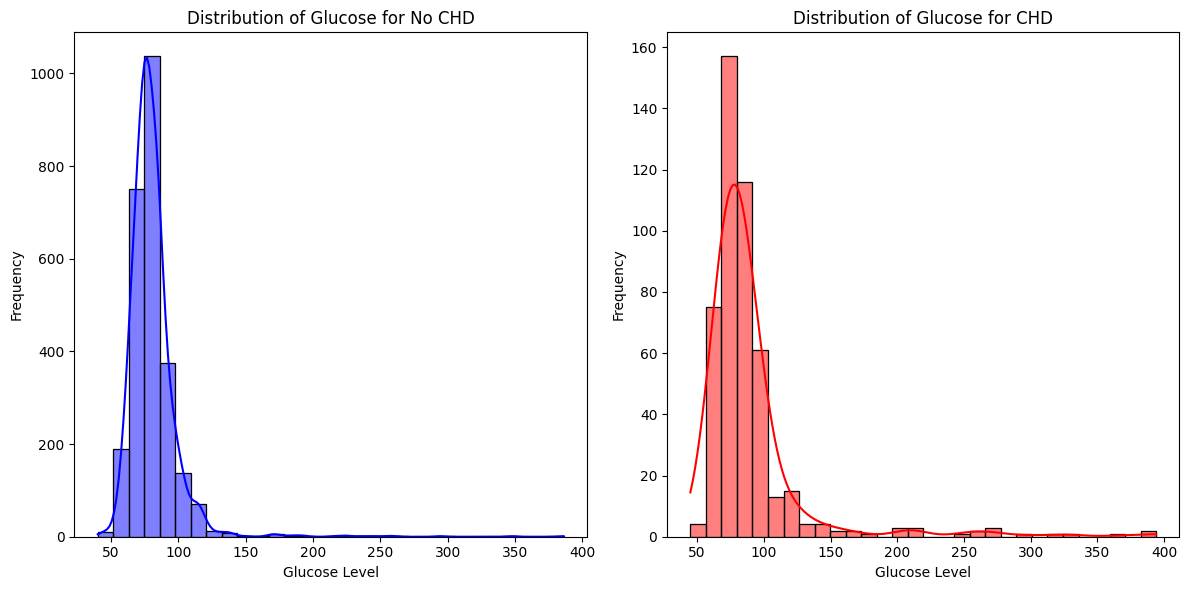

In [358]:
# Chart - 5 visualization code
# Set up the figure with subplots
plt.figure(figsize=(12, 6))

# Plot histogram for CHD = 0 (No CHD)
plt.subplot(1, 2, 1)
sns.histplot(df[df['TenYearCHD'] == 0]['glucose'], bins=30, kde=True, color='blue')
plt.title('Distribution of Glucose for No CHD')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')

# Plot histogram for CHD = 1 (With CHD)
plt.subplot(1, 2, 2)
sns.histplot(df[df['TenYearCHD'] == 1]['glucose'], bins=30, kde=True, color='red')
plt.title('Distribution of Glucose for CHD')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


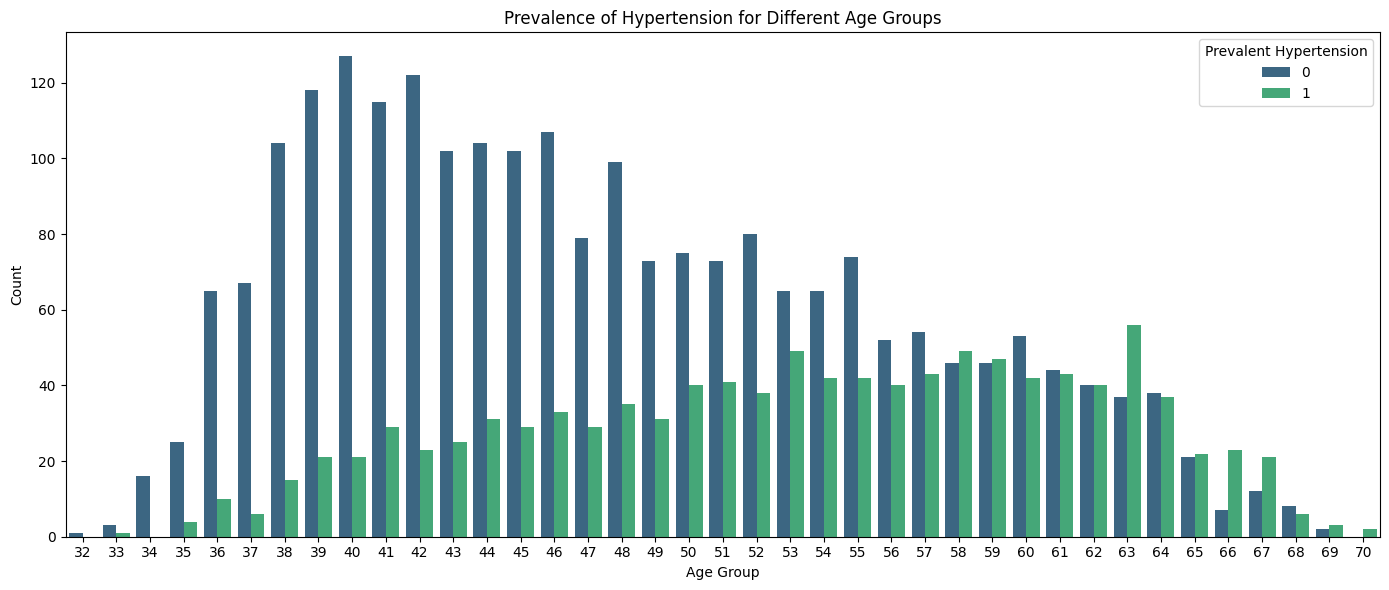

In [360]:
# Chart - 6 visualization code

# Set up the figure with subplots
plt.figure(figsize=(14, 6))

# Plot the prevalence of hypertension for different age groups
sns.countplot(x='age', hue='prevalentHyp', data=df, palette='viridis')
plt.title('Prevalence of Hypertension for Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Prevalent Hypertension')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

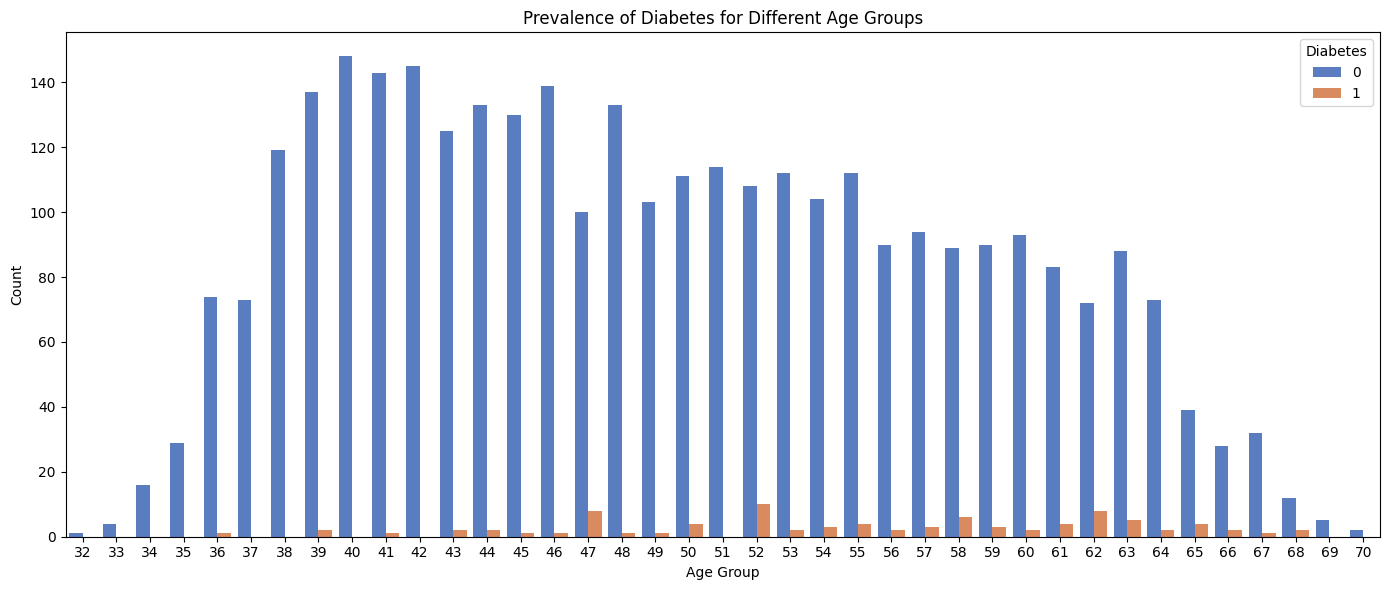

In [361]:
# Chart - 7 visualization code
# Set up the figure with subplots
plt.figure(figsize=(14, 6))
# Plot the prevalence of diabetes for different age groups
sns.countplot(x='age', hue='diabetes', data=df, palette='muted')
plt.title('Prevalence of Diabetes for Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Diabetes')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

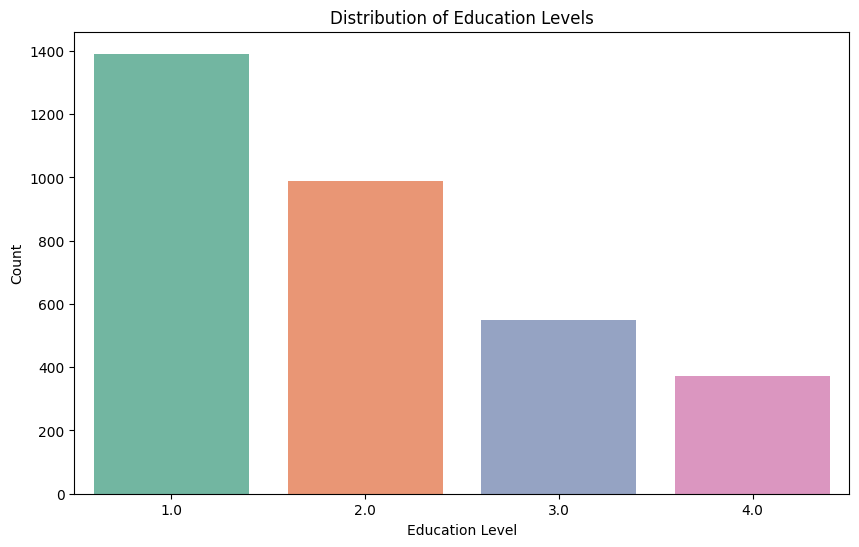

In [362]:
# Chart - 8 visualization code
# Plot the distribution of education levels
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=df, palette='Set2')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [363]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [364]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [365]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [366]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13 - Distribution Plot

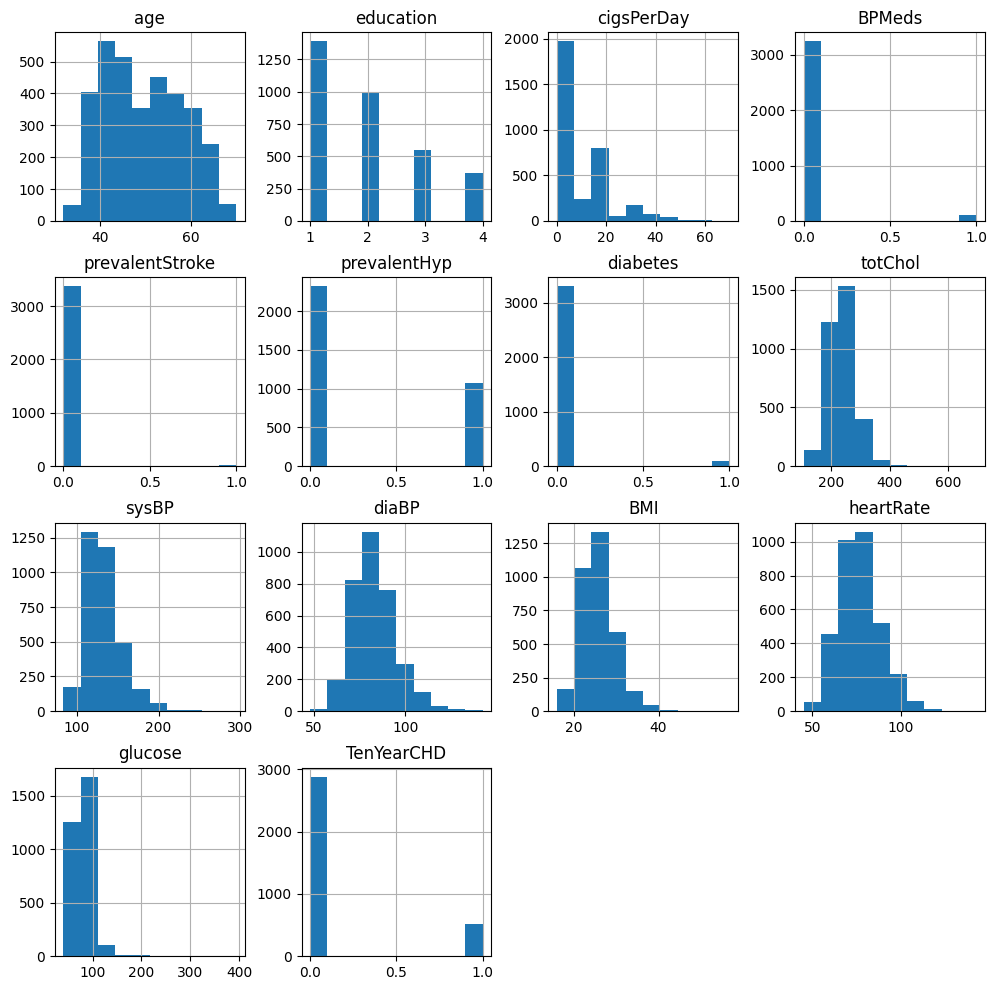

In [367]:
# Visualizing distributions using Histograms:
df.hist(figsize=(12, 12), grid=True);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

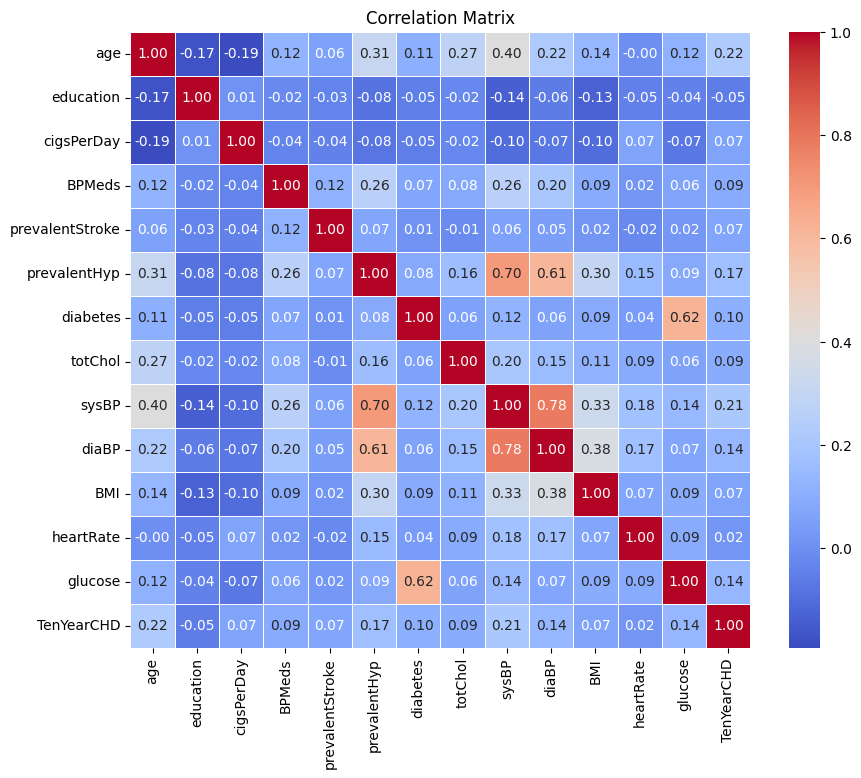

In [368]:
# Correlation Heatmap visualization code

# Calculate the correlation matrix
correlation_matrix = df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [369]:
# # Create a pair plot
# sns.pairplot(df)
# plt.show()

In [370]:
# Assuming data_raw is your DataFrame
columns_to_drop = ['education']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Display the first few rows of the cleaned DataFrame
df.head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0   64   F        YES         3.0     0.0                0             0   
1   36   M         NO         0.0     0.0                0             1   
2   46   F        YES        10.0     0.0                0             0   
3   50   M        YES        20.0     0.0                0             1   
4   64   F        YES        30.0     0.0                0             0   

   diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
0         0    221.0  148.0   85.0    NaN       90.0     80.0           1  
1         0    212.0  168.0   98.0  29.77       72.0     75.0           0  
2         0    250.0  116.0   71.0  20.35       88.0     94.0           0  
3         0    233.0  158.0   88.0  28.26       68.0     94.0           1  
4         0    241.0  136.5   85.0  26.42       70.0     77.0           0

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [371]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [372]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [373]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [374]:
df.isna().sum()

age                  0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [375]:
df[df['cigsPerDay'].isna()].head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
422   55   F        YES         NaN     0.0                0             1   
466   45   M        YES         NaN     0.0                0             1   
469   42   M        YES         NaN     0.0                0             0   
491   61   F        YES         NaN     0.0                0             1   
538   41   F        YES         NaN     0.0                0             0   

     diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
422         0    213.0  163.0   91.0  28.66       69.0     66.0           0  
466         0    170.0  145.5   99.0  26.74       83.0     85.0           0  
469         0    196.0  123.0   73.0  22.06       66.0      NaN           0  
491         0    356.0  168.0   98.0  27.30      103.0    106.0           0  
538         0    171.0  135.0   82.5  24.35       79.0     82.0           0

In [376]:
df[df['BPMeds'].isna()].head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
8     41   F        YES        20.0     NaN                0             0   
102   68   F         NO         0.0     NaN                0             0   
128   67   F         NO         0.0     NaN                0             0   
174   60   F         NO         0.0     NaN                0             1   
194   56   F         NO         0.0     NaN                0             1   

     diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
8           0    220.0  126.0   78.0  20.70       86.0     79.0           0  
102         0    257.0  144.0   95.0  29.25       80.0     77.0           0  
128         0    261.0  117.0   63.0  22.55       75.0     83.0           0  
174         0    273.0  176.0   84.0  22.17       66.0     79.0           0  
194         0    391.0  126.0   84.0  24.83       80.0     78.0           0

In [377]:
df[df['totChol'].isna()].head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
10    61   F         NO         0.0     0.0                0             1   
69    65   M         NO         0.0     0.0                0             0   
254   52   F         NO         0.0     0.0                0             0   
290   37   F        YES        30.0     0.0                0             0   
554   38   F        YES         3.0     1.0                0             1   

     diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
10          0      NaN  185.0  121.0  35.22       80.0      NaN           0  
69          0      NaN  152.5   97.5  28.35       65.0     73.0           0  
254         0      NaN  129.0   83.0  32.57       65.0      NaN           0  
290         0      NaN  115.0   79.0  28.41       85.0      NaN           0  
554         0      NaN  125.0   80.0  22.79       98.0      NaN           0

In [378]:
df[df['BMI'].isna()].head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0      64   F        YES         3.0     0.0                0             0   
54     63   M        YES        20.0     0.0                1             1   
271    47   F         NO         0.0     0.0                0             0   
720    61   F         NO         0.0     0.0                0             1   
1057   64   M        YES        20.0     0.0                0             0   

      diabetes  totChol  sysBP  diaBP  BMI  heartRate  glucose  TenYearCHD  
0            0    221.0  148.0   85.0  NaN       90.0     80.0           1  
54           0    213.0  163.0   94.0  NaN       76.0     69.0           1  
271          0    195.0  126.0   75.0  NaN       60.0      NaN           1  
720          0    300.0  150.5   89.0  NaN       68.0     72.0           1  
1057         0    225.0  120.0   75.0  NaN       70.0     94.0           0

In [379]:
df[df['glucose'].isna()].head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
9    55   F         NO         0.0     0.0                0             1   
10   61   F         NO         0.0     0.0                0             1   
36   46   F         NO         0.0     0.0                0             0   
38   41   F        YES         9.0     1.0                1             1   
55   51   F         NO         0.0     0.0                0             1   

    diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
9          0    326.0  144.0   81.0  25.71       85.0      NaN           0  
10         0      NaN  185.0  121.0  35.22       80.0      NaN           0  
36         0    193.0  106.5   70.5  26.18       75.0      NaN           0  
38         0    180.0  114.0   70.0  22.41       92.0      NaN           0  
55         0    351.0  134.0   97.5  21.66      100.0      NaN           0

In [380]:
df[df['heartRate'].isna()].head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
1388   64   M        YES        18.0     0.0                0             1   

      diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
1388         0    219.0  172.5   75.0  29.29        NaN     91.0           1

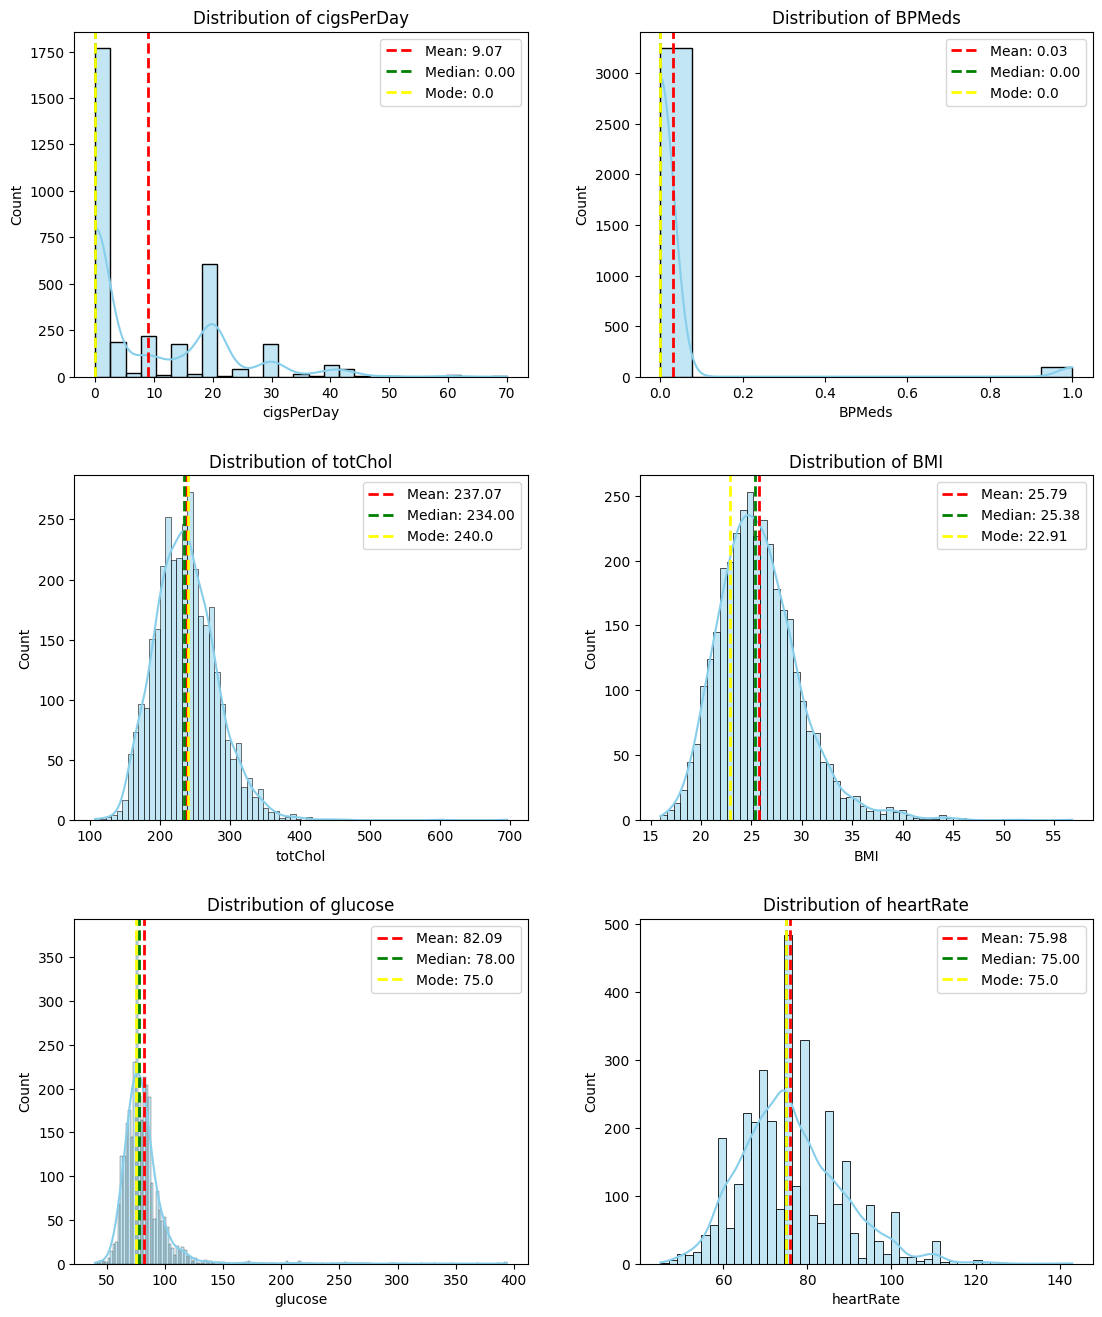

In [381]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_raw is your DataFrame

# List of columns to plot
columns_to_plot = ['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose', 'heartRate']

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 14))
fig.tight_layout(pad=5.0)

for i, column in enumerate(columns_to_plot):
    # Plot distribution
    sns.histplot(data_raw[column], kde=True, ax=axes[i // 2, i % 2], color='skyblue')

    # Annotate with mean, median, mode
    mean_value = data_raw[column].mean()
    median_value = data_raw[column].median()
    mode_value = data_raw[column].mode().values[0]

    axes[i // 2, i % 2].axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    axes[i // 2, i % 2].axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
    axes[i // 2, i % 2].axvline(mode_value, color='yellow', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value}')

    axes[i // 2, i % 2].legend()
    axes[i // 2, i % 2].set_title(f'Distribution of {column}')

plt.show()

In [382]:
# Calculate the mean of a specific column
column_mean = df['cigsPerDay'].mean()

print(f"Mean of 'cigsPerDay': {column_mean}")

# Replace the Nan values with Mean.
df['cigsPerDay'].fillna(column_mean, inplace=True)

Mean of 'cigsPerDay': 9.069477434679335


In [383]:
# Calculate the mean of a heartRate column
column_mean = df['heartRate'].mean()

print(f"Mean of 'heartRate': {column_mean}")

# Replace the Nan values with mean.
df['heartRate'].fillna(column_mean, inplace=True)

Mean of 'heartRate': 75.97727943346119


In [384]:
# Calculate the mean of a totChol column
column_median = df['totChol'].median()

print(f"Median of 'totChol': {column_median}")

# Replace the Nan values with Median.
df['totChol'].fillna(column_median, inplace=True)

Median of 'totChol': 234.0


In [385]:
# Calculate the mean of a BMI column
column_median = df['BMI'].median()

print(f"Median of 'BMI': {column_median}")

# Replace the Nan values with Median.
df['BMI'].fillna(column_median, inplace=True)

Median of 'BMI': 25.38


In [386]:
# Calculate the mean of a glucose column
column_median = df['glucose'].median()

print(f"Median of 'glucose': {column_median}")

# Replace the Nan values with Median.
df['glucose'].fillna(column_median, inplace=True)

Median of 'glucose': 78.0


In [387]:
# Calculate the mode of a BPMeds column
column_mode = df['BPMeds'].mode().values[0]

print(f"Mode of BPMeds: {column_mode}")

# Replace the Nan values with Mode.
df['BPMeds'].fillna(column_mode, inplace=True)

Mode of BPMeds: 0.0


In [388]:
df.isna().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   object 
 2   is_smoking       3390 non-null   object 
 3   cigsPerDay       3390 non-null   float64
 4   BPMeds           3390 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3390 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3390 non-null   float64
 12  heartRate        3390 non-null   float64
 13  glucose          3390 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 397.4+ KB


In [390]:
# Select the non desired columns from 'df'
non_desired_column = ['age','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']

# Create a new DataFrame with the selected columns
data = df[non_desired_column]

data.head()

age sex is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0   64   F        YES     0.0                0             0         0   
1   36   M         NO     0.0                0             1         0   
2   46   F        YES     0.0                0             0         0   
3   50   M        YES     0.0                0             1         0   
4   64   F        YES     0.0                0             0         0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [391]:
# Select the desired columns from 'df'
desired_columns = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

# Create a new DataFrame with the selected columns
data_a = df[desired_columns]

data_a.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0

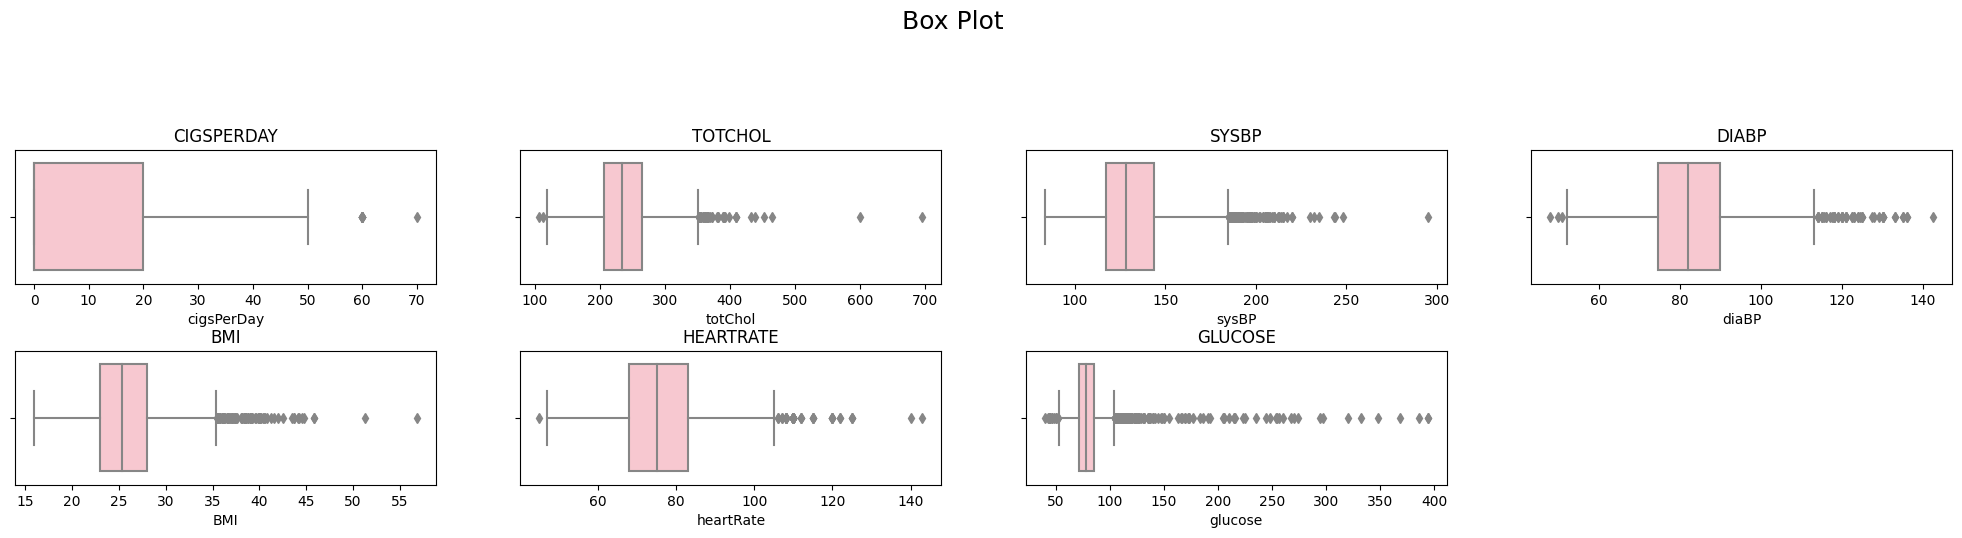

In [392]:
# Handling Outliers & Outlier treatments
df_2 = data_a.copy()

col_list = list(df_2.describe().columns)

#find the outliers using boxplot
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='pink', ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

In [393]:
# Handling Outliers & Outlier treatments

def find_outliers_iqr(df_2):
    # Calculate the first quartile (Q1) and third quartile (Q3) for each column
    q1 = df_2.quantile(0.25)
    q3 = df_2.quantile(0.75)

    # Calculate the interquartile range (IQR) for each column
    iqr = q3 - q1

    # Calculate the lower and upper bounds for outliers for each column
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Check for outliers in each column and count the number of outliers
    outliers_count = (df_2 < lower_bound) | (df_2 > upper_bound)
    num_outliers = outliers_count.sum()

    return num_outliers

outliers_per_column = find_outliers_iqr(df_2)
print("Number of outliers per column:")
print(outliers_per_column.sort_values(ascending = False))

Number of outliers per column:
glucose       214
sysBP         105
BMI            79
heartRate      64
diaBP          58
totChol        43
cigsPerDay      9
dtype: int64


In [394]:
# Handling Outliers & Outlier treatments
for ftr in col_list:
  print(ftr,'\n')
  q_25= np.percentile(df_2[ftr], 25)
  q_75 = np.percentile(df_2[ftr], 75)
  iqr = q_75 - q_25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q_25, q_75, iqr))

  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower = q_25 - cut_off
  upper = q_75 + cut_off
  print(f"\nlower = {lower} and upper = {upper} \n ")

  # identify outliers
  outliers = [x for x in df_2[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))

  #removing outliers
  if len(outliers)!=0:

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]


    data_a[ftr] =  df_2.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")

cigsPerDay 

Percentiles: 25th=0.000, 75th=20.000, IQR=20.000

lower = -30.0 and upper = 50.0 
 
Identified outliers: 9
cigsPerDay Outliers Removed

-------

totChol 

Percentiles: 25th=206.000, 75th=264.000, IQR=58.000

lower = 119.0 and upper = 351.0 
 
Identified outliers: 43
totChol Outliers Removed

-------

sysBP 

Percentiles: 25th=117.000, 75th=144.000, IQR=27.000

lower = 76.5 and upper = 184.5 
 
Identified outliers: 105
sysBP Outliers Removed

-------

diaBP 

Percentiles: 25th=74.500, 75th=90.000, IQR=15.500

lower = 51.25 and upper = 113.25 
 
Identified outliers: 58
diaBP Outliers Removed

-------

BMI 

Percentiles: 25th=23.030, 75th=27.997, IQR=4.967

lower = 15.578750000000005 and upper = 35.44875 
 
Identified outliers: 79
BMI Outliers Removed

-------

heartRate 

Percentiles: 25th=68.000, 75th=83.000, IQR=15.000

lower = 45.5 and upper = 105.5 
 
Identified outliers: 64
heartRate Outliers Removed

-------

glucose 

Percentiles: 25th=72.000, 75th=85.000, IQR=13.000


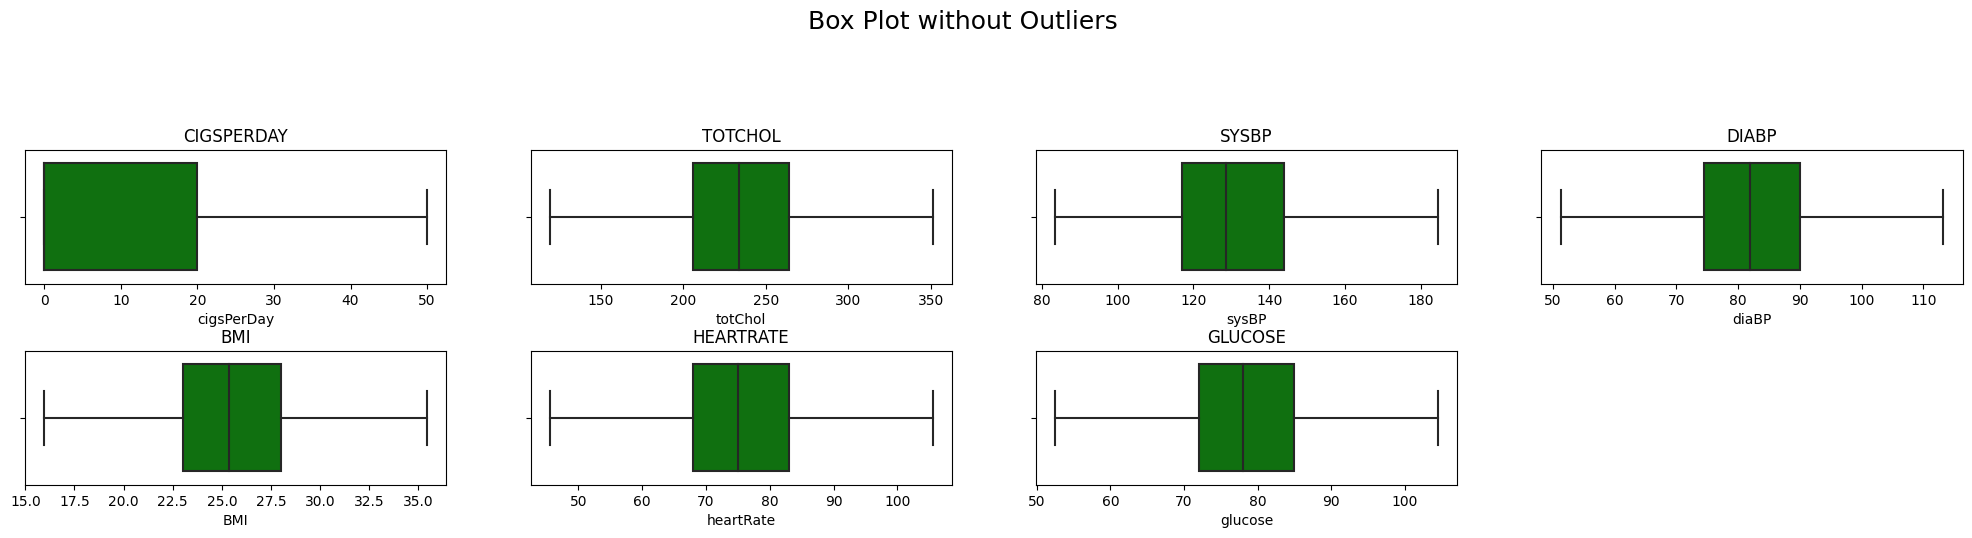

In [395]:
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot without Outliers", fontsize=18, y=0.95)
#plot the all figures in loop with boxplot
for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=data_a[ticker],color='g' ,ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

In [396]:
# Concatenate the two DataFrames vertically
df_new = pd.concat([data_a,data],axis=1)

In [397]:
data_a.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0

In [398]:
data.head()

age sex is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0   64   F        YES     0.0                0             0         0   
1   36   M         NO     0.0                0             1         0   
2   46   F        YES     0.0                0             0         0   
3   50   M        YES     0.0                0             1         0   
4   64   F        YES     0.0                0             0         0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [399]:
df_new.shape

(3390, 15)

In [400]:
df_new.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  age sex  \
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0   64   F   
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0   36   M   
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0   46   F   
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0   50   M   
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0   64   F   

  is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  TenYearCHD  
0        YES     0.0                0             0         0           1  
1         NO     0.0                0             1         0           0  
2        YES     0.0                0             0         0           0  
3        YES     0.0                0             1         0           1  
4        YES     0.0                0             0         0           0

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [401]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'rating' column to perform label encoding
df_new['sex_encoded'] = label_encoder.fit_transform(df_new['sex'])


df_new.drop('sex', axis=1, inplace=True)

In [402]:
df_new.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  age  \
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0   64   
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0   36   
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0   46   
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0   50   
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0   64   

  is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  TenYearCHD  \
0        YES     0.0                0             0         0           1   
1         NO     0.0                0             1         0           0   
2        YES     0.0                0             0         0           0   
3        YES     0.0                0             1         0           1   
4        YES     0.0                0             0         0           0   

   sex_encoded  
0            0  
1            1  
2            0  
3            1  
4            0

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [403]:
def blood_presure_classification(SysBP, DiaBP):
  if (SysBP < 90) or (DiaBP < 60):
    return 0 # 'Hypotension'
  if (SysBP < 120) and (DiaBP < 80):
    return 1 # 'Optimal'
  if (SysBP < 130) or (DiaBP < 86):
    return 2 # 'Normal'
  if (SysBP < 140) or (DiaBP < 90):
    return 3 # 'PreHypertensive'
  if (SysBP > 140) and (DiaBP < 90):
    return 4 # 'IsolatedSystolicHypertension'
  if (SysBP < 160) or (DiaBP < 100):
    return 5 # 'GradeI'
  if (SysBP < 180) or (DiaBP < 110):
    return 6 # 'GradeII'
  return 7 # 'GradeIII'

In [404]:
df_new['Hypertension'] = df_new.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)
df_new.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  age  \
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0   64   
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0   36   
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0   46   
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0   50   
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0   64   

  is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  TenYearCHD  \
0        YES     0.0                0             0         0           1   
1         NO     0.0                0             1         0           0   
2        YES     0.0                0             0         0           0   
3        YES     0.0                0             1         0           1   
4        YES     0.0                0             0         0           0   

   sex_encoded  Hypertension  
0            0             2  
1            1             5  
2            0             1  
3            1             3  
4            0             2

In [405]:
def diabetes_grade(glucose):
  if glucose < 100:
    return 1 # 'Normal'
  if glucose < 125:
    return 2 # 'Prediabetic'
  if glucose < 200:
    return 3 # 'Mild'
  if glucose < 400:
    return 4 # 'Moderate'
  return 5 # 'Severe'

In [406]:
df_new['Diabetes'] = df_new['glucose'].apply(lambda x: diabetes_grade(x))
df_new.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  age  \
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0   64   
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0   36   
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0   46   
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0   50   
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0   64   

  is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  TenYearCHD  \
0        YES     0.0                0             0         0           1   
1         NO     0.0                0             1         0           0   
2        YES     0.0                0             0         0           0   
3        YES     0.0                0             1         0           1   
4        YES     0.0                0             0         0           0   

   sex_encoded  Hypertension  Diabetes  
0            0             2         1  
1            1             5         1  
2            0             1         1  
3            1             3         1  
4            0             2         1

In [407]:
# Calculating MAP using 'SysBP' and 'DiaBP'.
df_new["mean_art_pressure"] = (df_new["sysBP"] + 2 * df_new["diaBP"])/3

In [408]:
# remove not useful columns
df_new.drop(columns=['sysBP', 'diaBP', 'is_smoking'], inplace=True)

In [409]:
# # remove not useful columns
# df_new.drop(columns=['sysBP', 'diaBP', 'glucose', 'diabetes', 'is_smoking','prevalentHyp'], inplace=True)

In [410]:
# Manipulate Features to minimize feature correlation and create new features
#examining the skewness in the dataset to check the distribution
skewness = df_new.skew()

#ginding the absolute value
abs(skewness)

# setting up the threshold
skewness_threshold = 0.5

# Separate features into symmetrical and skewed based on skewness threshold
symmetrical_features = skewness[abs(skewness) < skewness_threshold].index
skewed_features = skewness[abs(skewness) >= skewness_threshold].index

# Create new DataFrames for symmetrical and skewed features
print('FEATURES FOLLOWED SYMMETRICAL DISTRIBUTION :')
symmetrical_data = df_new[symmetrical_features]
print(symmetrical_features)

print('FEATURES FOLLOWED SKEWED DISTRIBUTION :')
skewed_data = df_new[skewed_features]
print(skewed_features)

FEATURES FOLLOWED SYMMETRICAL DISTRIBUTION :
Index(['totChol', 'BMI', 'heartRate', 'glucose', 'age', 'sex_encoded'], dtype='object')
FEATURES FOLLOWED SKEWED DISTRIBUTION :
Index(['cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'TenYearCHD', 'Hypertension', 'Diabetes', 'mean_art_pressure'],
      dtype='object')


In [411]:
df_new.shape

(3390, 15)

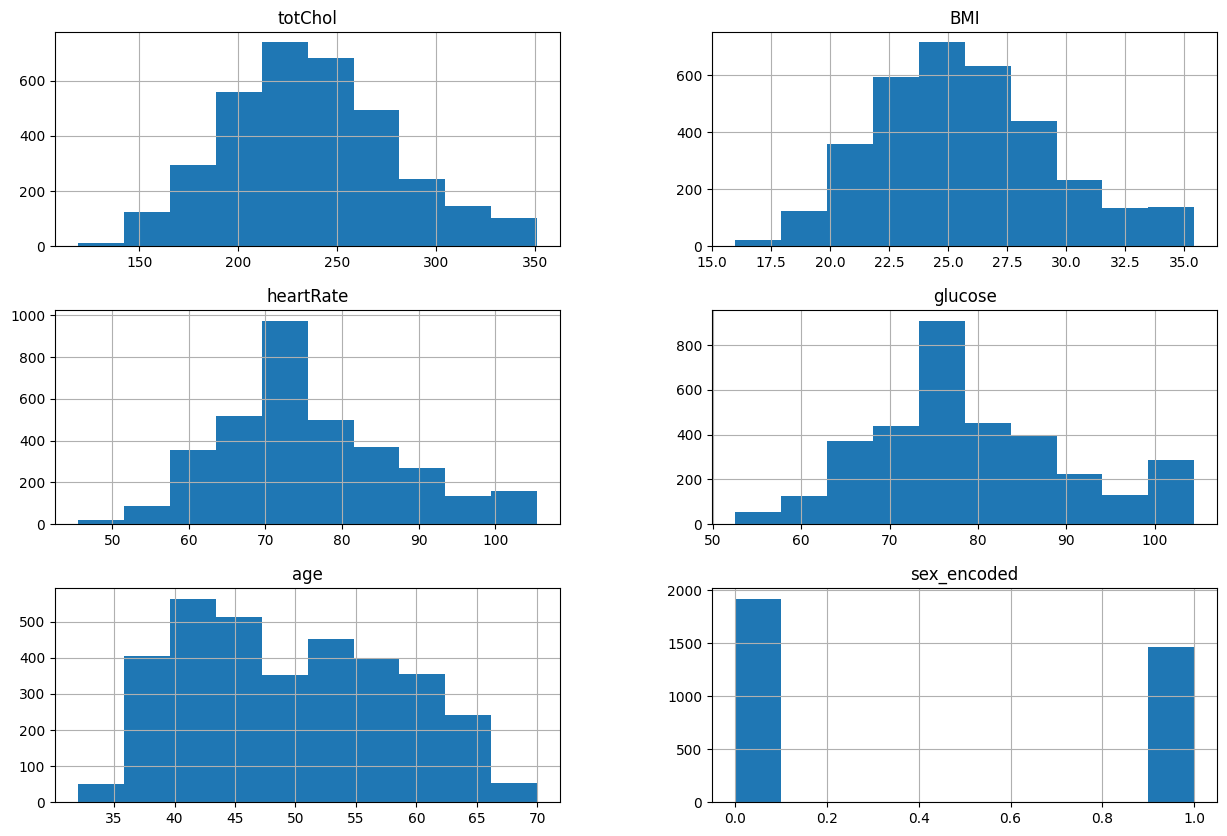

In [412]:
# Visualizing distributions using Histograms:
symmetrical_data.hist(figsize=(15, 10), grid=True);

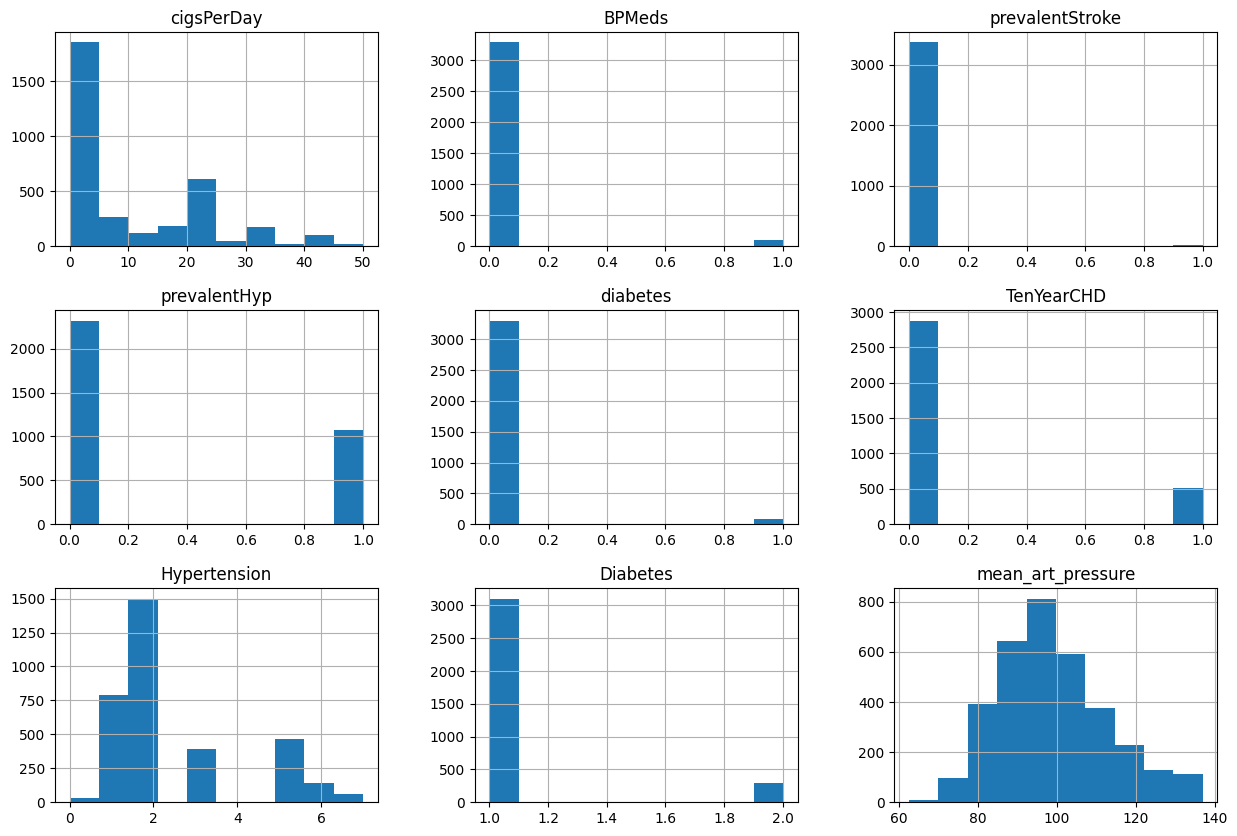

In [413]:
# Visualizing distributions using Histograms:
skewed_data.hist(figsize=(15, 10), grid=True);

#### 2. Feature Selection

In [425]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

# Assuming "transformed_data" is your DataFrame and "TenYearCHD" is the dependent variable
# Replace these names with your actual DataFrame and column names

# Assuming "transformed_data" is your DataFrame and "TenYearCHD" is the dependent variable
# Replace these names with your actual DataFrame and column names

# Assuming "transformed_data" is your DataFrame and "TenYearCHD" is the dependent variable
# Replace these names with your actual DataFrame and column names

# Split the data into features (X) and target variable (y)
X = tranformed_data.drop("TenYearCHD", axis=1)
y = tranformed_data["TenYearCHD"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame(rf_classifier.feature_importances_, index=X_train.columns, columns=['importance'])

# Select features based on importance threshold
sfm = SelectFromModel(rf_classifier, threshold=0.01)  # Adjust the threshold as needed
sfm.fit(X_train, y_train)

# Transform the data to keep only important features
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Train a new Random Forest model on the selected features
rf_classifier_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_selected.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_selected = rf_classifier_selected.predict(X_test_selected)

# Evaluate the model performance
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy on Selected Features:", accuracy_selected)

# Print selected features
selected_features = X.columns[sfm.get_support()]
print("Selected Features:", selected_features)


Accuracy on Selected Features: 0.8687315634218289
Selected Features: Index(['totChol', 'BMI', 'heartRate', 'glucose', 'age', 'sex_encoded',
       'cigsPerDay', 'prevalentHyp', 'Hypertension', 'mean_art_pressure'],
      dtype='object')


In [310]:
# df_new.shape

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [414]:
skewed_data.columns

Index(['cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'TenYearCHD', 'Hypertension', 'Diabetes', 'mean_art_pressure'],
      dtype='object')

In [415]:
import pandas as pd

# Assuming 'skewed_data' is your DataFrame
unique_value_counts = skewed_data.nunique()

# Print or view the unique value counts for each column
print(unique_value_counts)

cigsPerDay            31
BPMeds                 2
prevalentStroke        2
prevalentHyp           2
diabetes               2
TenYearCHD             2
Hypertension           7
Diabetes               2
mean_art_pressure    376
dtype: int64


In [416]:
# Select the columns you want to transform
columns_to_transform = ['cigsPerDay','mean_art_pressure' ]

# Apply log transformation to the selected columns
skewed_data[columns_to_transform] = skewed_data[columns_to_transform].apply(lambda x: np.log1p(x))

# Display the transformed DataFrame
skewed_data.head()

cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  TenYearCHD  \
0    1.386294     0.0                0             0         0           1   
1    0.000000     0.0                0             1         0           0   
2    2.397895     0.0                0             0         0           0   
3    3.044522     0.0                0             1         0           1   
4    3.433987     0.0                0             0         0           0   

   Hypertension  Diabetes  mean_art_pressure  
0             2         1           4.672829  
1             5         1           4.806750  
2             1         1           4.465908  
3             3         1           4.721471  
4             2         1           4.636346

In [417]:
# # Select the columns you want to transform
# columns_to_transform = ['cigsPerDay', 'Hypertension']

# # Apply log transformation to the selected columns
# skewed_data[columns_to_transform] = skewed_data[columns_to_transform].apply(lambda x: np.log1p(x))

# # Display the transformed DataFrame
# skewed_data.head()

In [418]:
symmetrical_data.head()

totChol    BMI  heartRate  glucose  age  sex_encoded
0    221.0  25.38       90.0     80.0   64            0
1    212.0  29.77       72.0     75.0   36            1
2    250.0  20.35       88.0     94.0   46            0
3    233.0  28.26       68.0     94.0   50            1
4    241.0  26.42       70.0     77.0   64            0

In [419]:
# Concatenate horizontally (along columns)
tranformed_data = pd.concat([symmetrical_data, skewed_data], axis=1)

In [420]:
tranformed_data.head()

totChol    BMI  heartRate  glucose  age  sex_encoded  cigsPerDay  BPMeds  \
0    221.0  25.38       90.0     80.0   64            0    1.386294     0.0   
1    212.0  29.77       72.0     75.0   36            1    0.000000     0.0   
2    250.0  20.35       88.0     94.0   46            0    2.397895     0.0   
3    233.0  28.26       68.0     94.0   50            1    3.044522     0.0   
4    241.0  26.42       70.0     77.0   64            0    3.433987     0.0   

   prevalentStroke  prevalentHyp  diabetes  TenYearCHD  Hypertension  \
0                0             0         0           1             2   
1                0             1         0           0             5   
2                0             0         0           0             1   
3                0             1         0           1             3   
4                0             0         0           0             2   

   Diabetes  mean_art_pressure  
0         1           4.672829  
1         1           4.806750  
2         1           4.465908  
3         1           4.721471  
4         1           4.636346

In [421]:
tranformed_data.isna().sum()

totChol              0
BMI                  0
heartRate            0
glucose              0
age                  0
sex_encoded          0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
TenYearCHD           0
Hypertension         0
Diabetes             0
mean_art_pressure    0
dtype: int64

In [422]:
tranformed_data.shape

(3390, 15)

### 6. Data Scaling

In [426]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train_selected and X_test_selected are the selected features
# If you have a new dataset, replace them with the appropriate variable names

# Create a new DataFrame with only the selected features
new_df_train = pd.DataFrame(X_train_selected, columns=selected_features)
new_df_test = pd.DataFrame(X_test_selected, columns=selected_features)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
new_df_train_scaled = scaler.fit_transform(new_df_train)
new_df_test_scaled = scaler.transform(new_df_test)

# Now, new_df_train_scaled and new_df_test_scaled contain the scaled data
# You can use these DataFrames for further modeling or analysis

In [433]:

# Concatenate the training and testing sets
X_combined = np.concatenate([X_train_selected, X_test_selected], axis=0)

# Convert the concatenated array back to a DataFrame if needed
X_combined_df = pd.DataFrame(X_combined, columns=selected_features)

# Now, X_combined_df contains the combined selected features without scaling
# You can use this DataFrame for training and testing your machine learning models


In [434]:
X_combined_df.shape

(3390, 10)

In [320]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'tranformed_data' is your DataFrame
# Replace 'tranformed_data' with the actual name of your DataFrame

# Extract the 'TenYearCHD' column before scaling
ten_year_chd_column = tranformed_data['TenYearCHD']

# Drop the 'TenYearCHD' column before scaling
features_to_scale = tranformed_data.drop('TenYearCHD', axis=1)


# Scale the remaining features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# Create a new DataFrame with the scaled features and 'TenYearCHD' column
df_scaled = pd.DataFrame(scaled_features, columns=features_to_scale.columns)

# Add the 'TenYearCHD' column back to the DataFrame
df_scaled['TenYearCHD'] = ten_year_chd_column

# Display the DataFrame with scaled features
df_scaled.head()

totChol       BMI  heartRate   glucose       age  sex_encoded  cigsPerDay  \
0  0.439655  0.483356   0.741667  0.528846  0.842105          0.0    0.352583   
1  0.400862  0.708614   0.441667  0.432692  0.105263          1.0    0.000000   
2  0.564655  0.225258   0.708333  0.798077  0.368421          0.0    0.609868   
3  0.491379  0.631133   0.375000  0.798077  0.473684          1.0    0.774328   
4  0.525862  0.536720   0.408333  0.471154  0.842105          0.0    0.873382   

   BPMeds  prevalentStroke  prevalentHyp  diabetes  Hypertension  Diabetes  \
0     0.0              0.0           0.0       0.0      0.285714       0.0   
1     0.0              0.0           1.0       0.0      0.714286       0.0   
2     0.0              0.0           0.0       0.0      0.142857       0.0   
3     0.0              0.0           1.0       0.0      0.428571       0.0   
4     0.0              0.0           0.0       0.0      0.285714       0.0   

   mean_art_pressure  TenYearCHD  
0           0.671113           1  
1           0.844228           0  
2           0.403632           0  
3           0.733990           1  
4           0.623952           0

In [321]:
df_scaled.shape

(3390, 15)

In [322]:
# Drop all rows with NaN values in place
df_scaled.dropna(inplace=True)

In [323]:
df_scaled.isna().sum()

totChol              0
BMI                  0
heartRate            0
glucose              0
age                  0
sex_encoded          0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
Hypertension         0
Diabetes             0
mean_art_pressure    0
TenYearCHD           0
dtype: int64

In [324]:
df_scaled.shape

(3390, 15)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [325]:
y = df_scaled['TenYearCHD']
X = df_scaled.drop('TenYearCHD', axis=1)

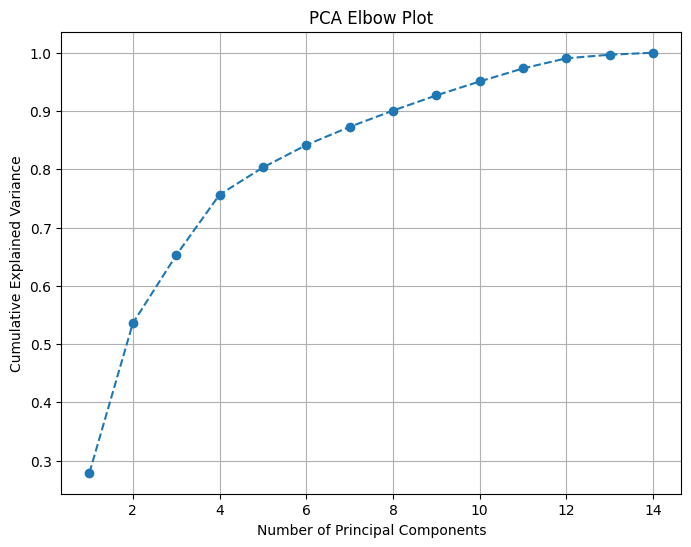

In [326]:
# DImensionality Reduction (If needed)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Initialize a PCA instance without specifying the number of components
pca = PCA()

# Fit the PCA model to your standardized data
pca.fit(X)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Create an elbow plot to visualize the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Elbow Plot')
plt.grid()
plt.show()

In [327]:
# Create a PCA instance and specify the number of components you want to retain
# For example, if you want to retain 7 components, set n_components=7
n_components = 10
pca = PCA(n_components=n_components)

# Fit the PCA model to your standardized data and transform it
transformed_data_pca = pca.fit_transform(X)

# The variable 'transformed_data_pca' now contains your data in the reduced-dimensional space with 'n_components' principal components.

# You can also access explained variance to see how much variance is explained by each component
explained_variance = pca.explained_variance_ratio_

In [328]:
# the variances of the pca that we extract and there importance in predicting the output
explained_variance

array([0.27915486, 0.25641998, 0.11678247, 0.10398378, 0.04667998,
       0.03854264, 0.03108918, 0.02799645, 0.02611734, 0.02388644])

In [329]:
#calculating the total of  explained_variance  which needs to be more than 90%
explained_variance.sum()

0.9506531142827757

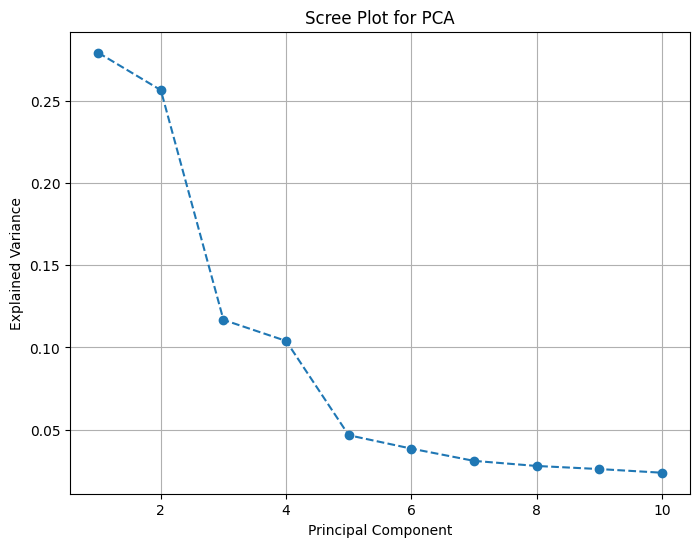

In [330]:
# Create a scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot for PCA')
plt.grid()
plt.show()

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [331]:
# Split your data to train and test. Choose Splitting ratio wisely.
x = transformed_data_pca
y = df_scaled['TenYearCHD']

In [332]:
#splitting the data into 80/20 ration
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)

In [333]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2712, 14) (678, 14) (2712,) (678,)


##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [435]:
tranformed_data["TenYearCHD"].shape

(3390,)

In [429]:
# Install the imbalanced-learn library
!pip install -U imbalanced-learn

In [436]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming X_train_selected and X_test_selected are the selected features
# new_df_train_scaled and new_df_test_scaled are the scaled versions of the selected features

# Split the data into features (X) and target variable (y)
X = X_combined_df
y = tranformed_data["TenYearCHD"]  # Assuming "transformed_data" is your original DataFrame

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert the resampled data back to DataFrames
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
y_train_resampled_df = pd.Series(y_train_resampled, name=y_train.name)

# Now, X_train_resampled_df and y_train_resampled_df contain the resampled data
# You can use these DataFrames for training your machine learning models

In [439]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming X_train_resampled_df and y_train_resampled_df are the resampled DataFrames
# X_test and y_test are the original test sets

# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model on the resampled training data
logreg_model.fit(X_train_resampled_df, y_train_resampled_df)

# Make predictions on the original test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
class_report_logreg = classification_report(y_test, y_pred_logreg)

# Print evaluation metrics
print("Accuracy (Logistic Regression):", accuracy_logreg)
print("\nConfusion Matrix (Logistic Regression):\n", conf_matrix_logreg)
print("\nClassification Report (Logistic Regression):\n", class_report_logreg)


Accuracy (Logistic Regression): 0.532448377581121

Confusion Matrix (Logistic Regression):
 [[307 274]
 [ 43  54]]

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.88      0.53      0.66       581
           1       0.16      0.56      0.25        97

    accuracy                           0.53       678
   macro avg       0.52      0.54      0.46       678
weighted avg       0.78      0.53      0.60       678



In [441]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming X_combined_df and tranformed_data are the DataFrames
# Replace these names with the appropriate variable names from your dataset

# Split the data into features (X) and target variable (y)
X = X_combined_df
y = tranformed_data["TenYearCHD"]

# Apply SMOTE to the entire dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Set up logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1.0, 10.0], 'penalty': ['l1', 'l2']}

# Use StratifiedKFold for cross-validation (suitable for imbalanced datasets)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metric (accuracy in this case)
scorer = make_scorer(accuracy_score)

# Create GridSearchCV instance
grid_search = GridSearchCV(logreg_model, param_grid, scoring=scorer, cv=cv, n_jobs=-1)

# Fit the model to the resampled data
grid_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best model for predictions
best_logreg_model = grid_search.best_estimator_
y_pred_best_logreg = best_logreg_model.predict(X_test)

# Evaluate the best Logistic Regression model
accuracy_best_logreg = accuracy_score(y_test, y_pred_best_logreg)
conf_matrix_best_logreg = confusion_matrix(y_test, y_pred_best_logreg)
class_report_best_logreg = classification_report(y_test, y_pred_best_logreg)

# Print evaluation metrics and best hyperparameters
print("Best Hyperparameters:", best_params)
print("\nAccuracy (Best Logistic Regression):", accuracy_best_logreg)
print("\nConfusion Matrix (Best Logistic Regression):\n", conf_matrix_best_logreg)
print("\nClassification Report (Best Logistic Regression):\n", class_report_best_logreg)


Best Hyperparameters: {'C': 1.0, 'penalty': 'l2'}

Accuracy (Best Logistic Regression): 0.528023598820059

Confusion Matrix (Best Logistic Regression):
 [[302 279]
 [ 41  56]]

Classification Report (Best Logistic Regression):
               precision    recall  f1-score   support

           0       0.88      0.52      0.65       581
           1       0.17      0.58      0.26        97

    accuracy                           0.53       678
   macro avg       0.52      0.55      0.46       678
weighted avg       0.78      0.53      0.60       678



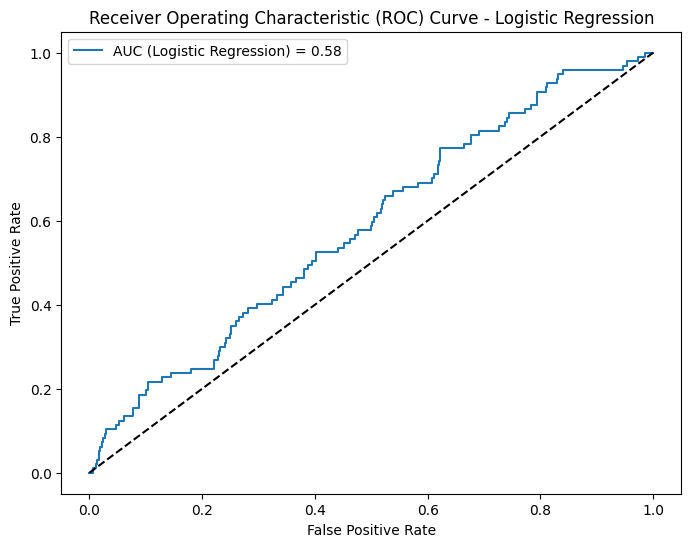

AUC-ROC Score (Logistic Regression): 0.5847365899533332


In [442]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming best_logreg_model is the best Logistic Regression model from the previous code

# Predict probabilities for the positive class
y_prob_best_logreg = best_logreg_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and score
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_prob_best_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_prob_best_logreg)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'AUC (Logistic Regression) = {roc_auc_logreg:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend()
plt.show()

# Print AUC-ROC score
print("AUC-ROC Score (Logistic Regression):", roc_auc_logreg)


Accuracy (Decision Tree): 1.0

Confusion Matrix (Decision Tree):
 [[581   0]
 [  0  97]]

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       581
           1       1.00      1.00      1.00        97

    accuracy                           1.00       678
   macro avg       1.00      1.00      1.00       678
weighted avg       1.00      1.00      1.00       678



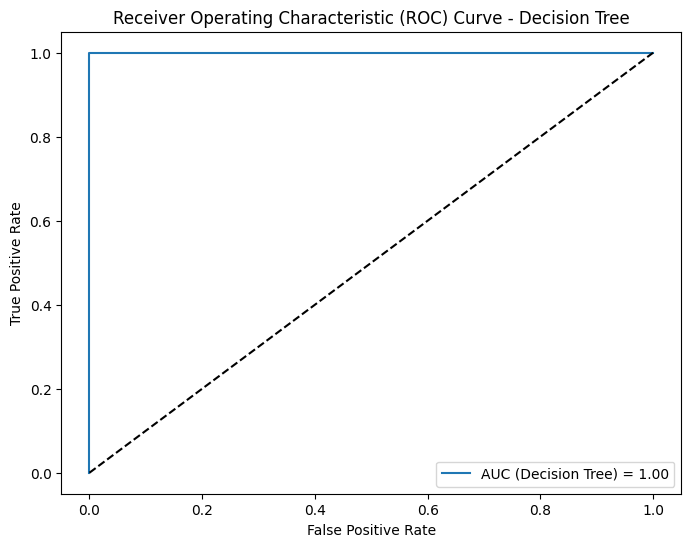

AUC-ROC Score (Decision Tree): 1.0


In [443]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming X_combined_df and tranformed_data are the DataFrames
# Replace these names with the appropriate variable names from your dataset

# Split the data into features (X) and target variable (y)
X = X_combined_df
y = tranformed_data["TenYearCHD"]

# Apply SMOTE to the entire dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Set up Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model on the resampled data
decision_tree_model.fit(X_resampled, y_resampled)

# Make predictions on the original test set
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
class_report_decision_tree = classification_report(y_test, y_pred_decision_tree)

# Print evaluation metrics
print("Accuracy (Decision Tree):", accuracy_decision_tree)
print("\nConfusion Matrix (Decision Tree):\n", conf_matrix_decision_tree)
print("\nClassification Report (Decision Tree):\n", class_report_decision_tree)

# Predict probabilities for the positive class
y_prob_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and score
fpr_decision_tree, tpr_decision_tree, thresholds_decision_tree = roc_curve(y_test, y_prob_decision_tree)
roc_auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_decision_tree, tpr_decision_tree, label=f'AUC (Decision Tree) = {roc_auc_decision_tree:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend()
plt.show()

# Print AUC-ROC score
print("AUC-ROC Score (Decision Tree):", roc_auc_decision_tree)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Accuracy (Best Decision Tree): 1.0

Confusion Matrix (Best Decision Tree):
 [[581   0]
 [  0  97]]

Classification Report (Best Decision Tree):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       581
           1       1.00      1.00      1.00        97

    accuracy                           1.00       678
   macro avg       1.00      1.00      1.00       678
weighted avg       1.00      1.00      1.00       678



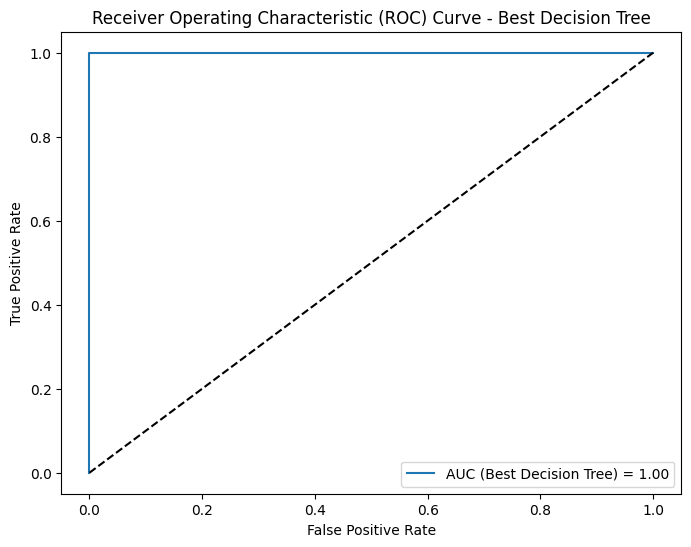

AUC-ROC Score (Best Decision Tree): 1.0


In [444]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming X_combined_df and tranformed_data are the DataFrames
# Replace these names with the appropriate variable names from your dataset

# Split the data into features (X) and target variable (y)
X = X_combined_df
y = tranformed_data["TenYearCHD"]

# Apply SMOTE to the entire dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Set up Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use StratifiedKFold for cross-validation (suitable for imbalanced datasets)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metric (accuracy in this case)
scorer = make_scorer(accuracy_score)

# Create GridSearchCV instance
grid_search = GridSearchCV(decision_tree_model, param_grid, scoring=scorer, cv=cv, n_jobs=-1)

# Fit the model to the resampled data
grid_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best model for predictions on the original test set
best_decision_tree_model = grid_search.best_estimator_
y_pred_best_decision_tree = best_decision_tree_model.predict(X_test)

# Evaluate the best Decision Tree model
accuracy_best_decision_tree = accuracy_score(y_test, y_pred_best_decision_tree)
conf_matrix_best_decision_tree = confusion_matrix(y_test, y_pred_best_decision_tree)
class_report_best_decision_tree = classification_report(y_test, y_pred_best_decision_tree)

# Print evaluation metrics and best hyperparameters
print("Best Hyperparameters:", best_params)
print("\nAccuracy (Best Decision Tree):", accuracy_best_decision_tree)
print("\nConfusion Matrix (Best Decision Tree):\n", conf_matrix_best_decision_tree)
print("\nClassification Report (Best Decision Tree):\n", class_report_best_decision_tree)

# Predict probabilities for the positive class
y_prob_best_decision_tree = best_decision_tree_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and score
fpr_best_decision_tree, tpr_best_decision_tree, thresholds_best_decision_tree = roc_curve(y_test, y_prob_best_decision_tree)
roc_auc_best_decision_tree = roc_auc_score(y_test, y_prob_best_decision_tree)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_best_decision_tree, tpr_best_decision_tree, label=f'AUC (Best Decision Tree) = {roc_auc_best_decision_tree:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Best Decision Tree')
plt.legend()
plt.show()

# Print AUC-ROC score
print("AUC-ROC Score (Best Decision Tree):", roc_auc_best_decision_tree)


Accuracy (Gradient Boosting): 0.8495575221238938

Confusion Matrix (Gradient Boosting):
 [[573   8]
 [ 94   3]]

Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       581
           1       0.27      0.03      0.06        97

    accuracy                           0.85       678
   macro avg       0.57      0.51      0.49       678
weighted avg       0.78      0.85      0.79       678



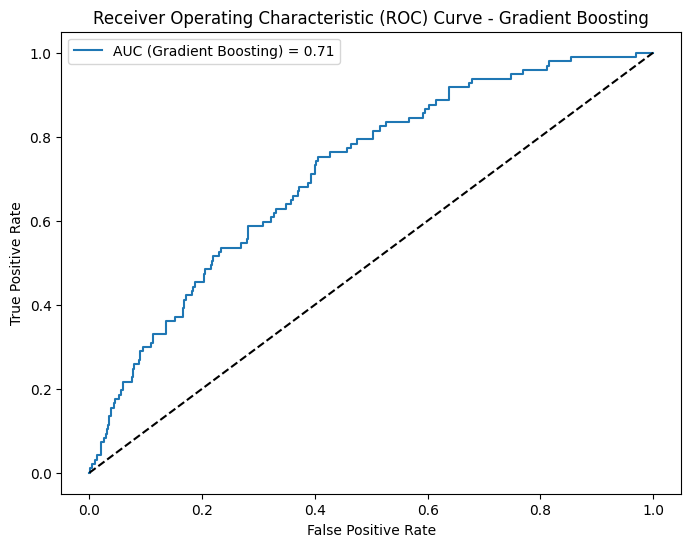

AUC-ROC Score (Gradient Boosting): 0.7144986425821105


In [445]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming X_combined_df and tranformed_data are the DataFrames
# Replace these names with the appropriate variable names from your dataset

# Split the data into features (X) and target variable (y)
X = X_combined_df
y = tranformed_data["TenYearCHD"]

# Apply SMOTE to the entire dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Set up Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Train the model on the resampled data
gradient_boosting_model.fit(X_resampled, y_resampled)

# Make predictions on the original test set
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

# Evaluate the Gradient Boosting model
accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)
conf_matrix_gradient_boosting = confusion_matrix(y_test, y_pred_gradient_boosting)
class_report_gradient_boosting = classification_report(y_test, y_pred_gradient_boosting)

# Print evaluation metrics
print("Accuracy (Gradient Boosting):", accuracy_gradient_boosting)
print("\nConfusion Matrix (Gradient Boosting):\n", conf_matrix_gradient_boosting)
print("\nClassification Report (Gradient Boosting):\n", class_report_gradient_boosting)

# Predict probabilities for the positive class
y_prob_gradient_boosting = gradient_boosting_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and score
fpr_gradient_boosting, tpr_gradient_boosting, thresholds_gradient_boosting = roc_curve(y_test, y_prob_gradient_boosting)
roc_auc_gradient_boosting = roc_auc_score(y_test, y_prob_gradient_boosting)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gradient_boosting, tpr_gradient_boosting, label=f'AUC (Gradient Boosting) = {roc_auc_gradient_boosting:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting')
plt.legend()
plt.show()

# Print AUC-ROC score
print("AUC-ROC Score (Gradient Boosting):", roc_auc_gradient_boosting)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming X_combined_df and tranformed_data are the DataFrames
# Replace these names with the appropriate variable names from your dataset

# Split the data into features (X) and target variable (y)
X = X_combined_df
y = tranformed_data["TenYearCHD"]

# Apply SMOTE to the entire dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Set up Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use StratifiedKFold for cross-validation (suitable for imbalanced datasets)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metric (accuracy in this case)
scorer = make_scorer(accuracy_score)

# Create GridSearchCV instance
grid_search = GridSearchCV(gradient_boosting_model, param_grid, scoring=scorer, cv=cv, n_jobs=-1)

# Fit the model to the resampled data
grid_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best model for predictions on the original test set
best_gradient_boosting_model = grid_search.best_estimator_
y_pred_best_gradient_boosting = best_gradient_boosting_model.predict(X_test)

# Evaluate the best Gradient Boosting model
accuracy_best_gradient_boosting = accuracy_score(y_test, y_pred_best_gradient_boosting)
conf_matrix_best_gradient_boosting = confusion_matrix(y_test, y_pred_best_gradient_boosting)
class_report_best_gradient_boosting = classification_report(y_test, y_pred_best_gradient_boosting)

# Print evaluation metrics and best hyperparameters
print("Best Hyperparameters:", best_params)
print("\nAccuracy (Best Gradient Boosting):", accuracy_best_gradient_boosting)
print("\nConfusion Matrix (Best Gradient Boosting):\n", conf_matrix_best_gradient_boosting)
print("\nClassification Report (Best Gradient Boosting):\n", class_report_best_gradient_boosting)

# Predict probabilities for the positive class
y_prob_best_gradient_boosting = best_gradient_boosting_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and score
fpr_best_gradient_boosting, tpr_best_gradient_boosting, thresholds_best_gradient_boosting = roc_curve(y_test, y_prob_best_gradient_boosting)
roc_auc_best_gradient_boosting = roc_auc_score(y_test, y_prob_best_gradient_boosting)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_best_gradient_boosting, tpr_best_gradient_boosting, label=f'AUC (Best Gradient Boosting) = {roc_auc_best_gradient_boosting:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Best Gradient Boosting')
plt.legend()
plt.show()

# Print AUC-ROC score
print("AUC-ROC Score (Best Gradient Boosting):", roc_auc_best_gradient_boosting)


In [437]:
X_train_resampled.shape

(4596, 10)

In [438]:
y_train_resampled.shape

(4596,)

In [335]:
#importing the SMOTETomek liabrary
from imblearn.combine import SMOTETomek

# Apply SMOTETomek to oversample the minority class and clean the majority class
smote_tomek = SMOTETomek(random_state=24)
x_resampled, y_resampled = smote_tomek.fit_resample(x_train, y_train)

# Now, x_train_resampled and y_train_resampled contain the oversampled and cleaned data
# You can also check the class distribution to verify the oversampling and cleaning
print("Class distribution before SMOTETomek:\n", y_train.value_counts())
print("\nClass distribution after SMOTETomek:\n", pd.Series(y_resampled).value_counts())

Class distribution before SMOTETomek:
 0    2314
1     398
Name: TenYearCHD, dtype: int64

Class distribution after SMOTETomek:
 0    2287
1    2287
Name: TenYearCHD, dtype: int64


In [220]:
from sklearn.preprocessing import PolynomialFeatures

# Assuming you already have x_resampled and y_resampled from SMOTETomek

# Create polynomial features
poly = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
x_resampled_poly = poly.fit_transform(x_resampled)



# Now we use x_resampled_poly contains the polynomial features of the oversampled and cleaned data

In [221]:
# Transform the test data using the same polynomial features
x_test_poly = poly.transform(x_test)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### Model 1 - Logistic Regression


Confusion Matrix:
 [[355 210]
 [ 33  80]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.63      0.75       565
           1       0.28      0.71      0.40       113

    accuracy                           0.64       678
   macro avg       0.60      0.67      0.57       678
weighted avg       0.81      0.64      0.69       678



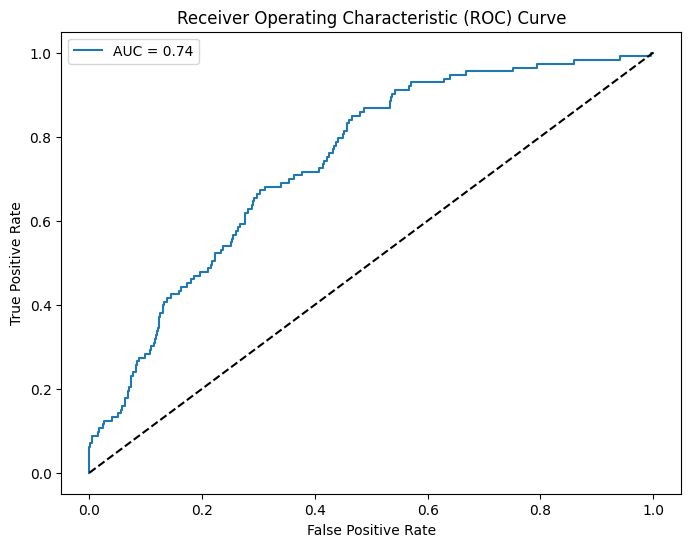

AUC-ROC Score: 0.7390398621661838


In [222]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Split the data into training and testing sets (if not done already)
# x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logreg_model = LogisticRegression()

# Fit the model to the resampled training data
logreg_model.fit(x_resampled, y_resampled)

# Make predictions on the test data
y_pred = logreg_model.predict(x_test)

# Evaluate the model
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ... (previous code)

# Predict probabilities for the positive class
y_prob = logreg_model.predict_proba(x_test)[:, 1]

# Calculate AUC-ROC curve and score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Print AUC score
print("AUC-ROC Score:", roc_auc)

Best Hyperparameters: {'C': 100, 'penalty': 'l2'}

Confusion Matrix:
 [[350 215]
 [ 33  80]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.62      0.74       565
           1       0.27      0.71      0.39       113

    accuracy                           0.63       678
   macro avg       0.59      0.66      0.57       678
weighted avg       0.81      0.63      0.68       678



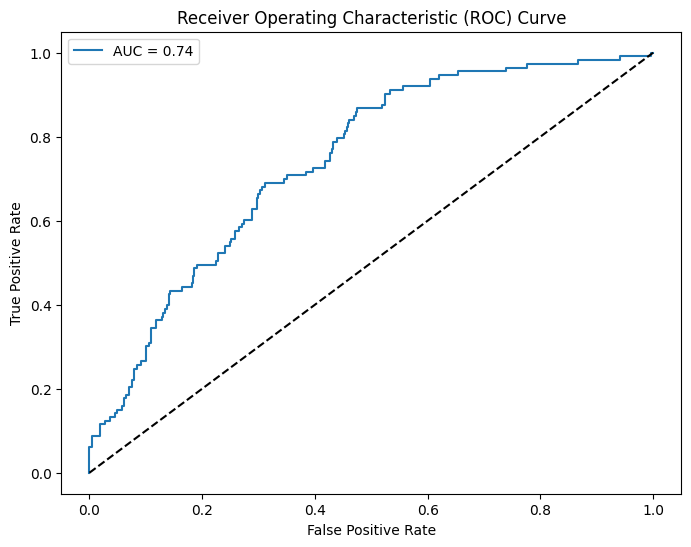

AUC-ROC Score: 0.7407157960686036


In [223]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
logreg_model = LogisticRegression()

# Define the hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

# Create GridSearchCV
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model to the resampled training data
grid_search.fit(x_resampled, y_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_logreg_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_logreg_model.predict(x_test)

# Evaluate the model
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Predict probabilities for the positive class
y_prob = best_logreg_model.predict_proba(x_test)[:, 1]

# Calculate AUC-ROC curve and score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Print AUC score
print("AUC-ROC Score:", roc_auc)


Confusion Matrix (Logistic Regression):
 [[383 182]
 [ 40  73]]

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.91      0.68      0.78       565
           1       0.29      0.65      0.40       113

    accuracy                           0.67       678
   macro avg       0.60      0.66      0.59       678
weighted avg       0.80      0.67      0.71       678



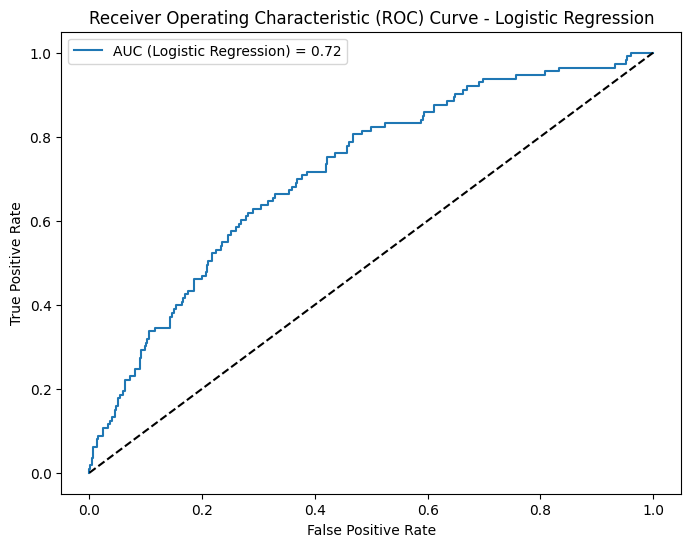

AUC-ROC Score (Logistic Regression): 0.7165165635523534


In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming you have x_resampled_poly, x_test_poly, y_resampled, y_test from the previous steps

# Create a Logistic Regression model
logreg_model = LogisticRegression()


# Fit the model to the polynomial features of the resampled training data
logreg_model.fit(x_resampled_poly, y_resampled)

# Make predictions on the test data
y_pred_logreg = logreg_model.predict(x_test_poly)

# Evaluate the Logistic Regression model
print("\nConfusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_logreg))

# Predict probabilities for the positive class
y_prob_logreg = logreg_model.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for Logistic Regression
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)

# Plot the ROC curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'AUC (Logistic Regression) = {roc_auc_logreg:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend()
plt.show()

# Print AUC score for Logistic Regression
print("AUC-ROC Score (Logistic Regression):", roc_auc_logreg)


Best Hyperparameters: {'C': 10, 'penalty': 'l2'}

Confusion Matrix (Logistic Regression - Tuned):
 [[381 184]
 [ 44  69]]

Classification Report (Logistic Regression - Tuned):
               precision    recall  f1-score   support

           0       0.90      0.67      0.77       565
           1       0.27      0.61      0.38       113

    accuracy                           0.66       678
   macro avg       0.58      0.64      0.57       678
weighted avg       0.79      0.66      0.70       678



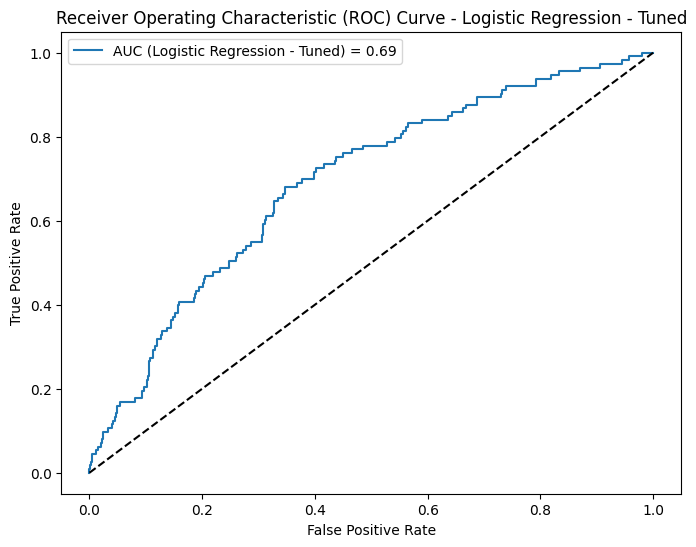

AUC-ROC Score (Logistic Regression - Tuned): 0.6913462291487195


In [104]:
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model
logreg_model = LogisticRegression()

# Define hyperparameter grid for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Create GridSearchCV instance
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='roc_auc')

# Fit the model to the polynomial features of the resampled training data
grid_search.fit(x_resampled_poly, y_resampled)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test data
y_pred_logreg_tuned = grid_search.predict(x_test_poly)

# Evaluate the Logistic Regression model with tuned hyperparameters
print("\nConfusion Matrix (Logistic Regression - Tuned):\n", confusion_matrix(y_test, y_pred_logreg_tuned))
print("\nClassification Report (Logistic Regression - Tuned):\n", classification_report(y_test, y_pred_logreg_tuned))

# Predict probabilities for the positive class
y_prob_logreg_tuned = grid_search.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for Logistic Regression with tuned hyperparameters
fpr_logreg_tuned, tpr_logreg_tuned, thresholds_logreg_tuned = roc_curve(y_test, y_prob_logreg_tuned)
roc_auc_logreg_tuned = roc_auc_score(y_test, y_prob_logreg_tuned)

# Plot the ROC curve for Logistic Regression with tuned hyperparameters
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg_tuned, tpr_logreg_tuned, label=f'AUC (Logistic Regression - Tuned) = {roc_auc_logreg_tuned:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression - Tuned')
plt.legend()
plt.show()

# Print AUC score for Logistic Regression with tuned hyperparameters
print("AUC-ROC Score (Logistic Regression - Tuned):", roc_auc_logreg_tuned)

In [225]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create individual models
lasso_model = Lasso(alpha=0.1)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a StackingClassifier with Lasso and Random Forest
stacking_classifier = StackingClassifier(
    estimators=[('lasso', lasso_model), ('random_forest', rf_model)],
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    stack_method='auto',
    cv=5
)

# Train the StackingClassifier on the training data
stacking_classifier.fit(x_resampled, y_resampled)

# Make predictions on the test data
y_pred_stacking = stacking_classifier.predict(x_test)

# Evaluate the StackingClassifier
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print("Accuracy (Stacking Classifier):", accuracy_stacking)

# Confusion Matrix
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)
print("\nConfusion Matrix (Stacking Classifier):\n", conf_matrix_stacking)

# Classification Report
class_report_stacking = classification_report(y_test, y_pred_stacking)
print("\nClassification Report (Stacking Classifier):\n", class_report_stacking)


Accuracy (Stacking Classifier): 0.8067846607669616

Confusion Matrix (Stacking Classifier):
 [[528  37]
 [ 94  19]]

Classification Report (Stacking Classifier):
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       565
           1       0.34      0.17      0.22       113

    accuracy                           0.81       678
   macro avg       0.59      0.55      0.56       678
weighted avg       0.76      0.81      0.78       678



In [229]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Create individual models
lasso_model = Lasso()
rf_model = RandomForestClassifier(random_state=42)

# Create a StackingClassifier with Lasso and Random Forest
stacking_classifier = StackingClassifier(
    estimators=[('lasso', lasso_model), ('random_forest', rf_model)],
    final_estimator=RandomForestClassifier(random_state=42),
    stack_method='auto',
    cv=5
)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'lasso__alpha': [0.001, 0.01, 0.1],
    'random_forest__n_estimators': [50, 100],
    'random_forest__max_depth': [None, 10],
    'final_estimator__n_estimators': [50, 100],
    'final_estimator__max_depth': [None, 10]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(stacking_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(x_resampled, y_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best model for predictions
best_stacking_classifier = grid_search.best_estimator_
y_pred_stacking = best_stacking_classifier.predict(x_test)

# Evaluate the best Stacking Classifier
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print("\nBest Hyperparameters:", best_params)
print("\nAccuracy (Best Stacking Classifier):", accuracy_stacking)

# Confusion Matrix
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)
print("\nConfusion Matrix (Best Stacking Classifier):\n", conf_matrix_stacking)

# Classification Report
class_report_stacking = classification_report(y_test, y_pred_stacking)
print("\nClassification Report (Best Stacking Classifier):\n", class_report_stacking)

# Cross-Validation Scores for the Best Model
cross_val_scores = cross_val_score(best_stacking_classifier, x_train, y_train, cv=5, scoring='accuracy')
print("\nCross-Validation Scores (Best Stacking Classifier):\n", cross_val_scores)
print("Mean Cross-Validation Accuracy (Best Stacking Classifier):", cross_val_scores.mean())


KeyboardInterrupt: ignored

In [230]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import Lasso
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create individual models
lasso_model = Lasso(alpha=0.1)
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)  # You can adjust n_estimators as needed

# Create a StackingClassifier with Lasso and AdaBoost
stacking_classifier = StackingClassifier(
    estimators=[('lasso', lasso_model), ('adaboost', adaboost_model)],
    final_estimator=AdaBoostClassifier(n_estimators=50, random_state=42),  # You can adjust n_estimators as needed
    stack_method='auto',
    cv=5
)

# Train the StackingClassifier on the training data
stacking_classifier.fit(x_resampled, y_resampled)

# Make predictions on the test data
y_pred_stacking = stacking_classifier.predict(x_test)

# Evaluate the StackingClassifier
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print("Accuracy (Stacking Classifier):", accuracy_stacking)

# Confusion Matrix
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)
print("\nConfusion Matrix (Stacking Classifier):\n", conf_matrix_stacking)

# Classification Report
class_report_stacking = classification_report(y_test, y_pred_stacking)
print("\nClassification Report (Stacking Classifier):\n", class_report_stacking)


Accuracy (Stacking Classifier): 0.7743362831858407

Confusion Matrix (Stacking Classifier):
 [[489  76]
 [ 77  36]]

Classification Report (Stacking Classifier):
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       565
           1       0.32      0.32      0.32       113

    accuracy                           0.77       678
   macro avg       0.59      0.59      0.59       678
weighted avg       0.77      0.77      0.77       678



In [231]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

# Create individual models
lasso_model = Lasso(alpha=0.1)
xgb_model = XGBClassifier(n_estimators=50, random_state=42)  # You can adjust n_estimators as needed

# Create a StackingClassifier with Lasso and XGBoost
stacking_classifier = StackingClassifier(
    estimators=[('lasso', lasso_model), ('xgb', xgb_model)],
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    stack_method='auto',
    cv=5
)

# Train the StackingClassifier on the training data
stacking_classifier.fit(x_resampled, y_resampled)

# Make predictions on the test data
y_pred_stacking = stacking_classifier.predict(x_test)

# Evaluate the StackingClassifier
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print("Accuracy (Stacking Classifier):", accuracy_stacking)

# Confusion Matrix
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)
print("\nConfusion Matrix (Stacking Classifier):\n", conf_matrix_stacking)

# Classification Report
class_report_stacking = classification_report(y_test, y_pred_stacking)
print("\nClassification Report (Stacking Classifier):\n", class_report_stacking)

Accuracy (Stacking Classifier): 0.803834808259587

Confusion Matrix (Stacking Classifier):
 [[528  37]
 [ 96  17]]

Classification Report (Stacking Classifier):
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       565
           1       0.31      0.15      0.20       113

    accuracy                           0.80       678
   macro avg       0.58      0.54      0.55       678
weighted avg       0.76      0.80      0.77       678



### Model 2 - Decision Tree


Confusion Matrix (Decision Tree):
 [[448 117]
 [ 76  37]]

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       565
           1       0.24      0.33      0.28       113

    accuracy                           0.72       678
   macro avg       0.55      0.56      0.55       678
weighted avg       0.75      0.72      0.73       678



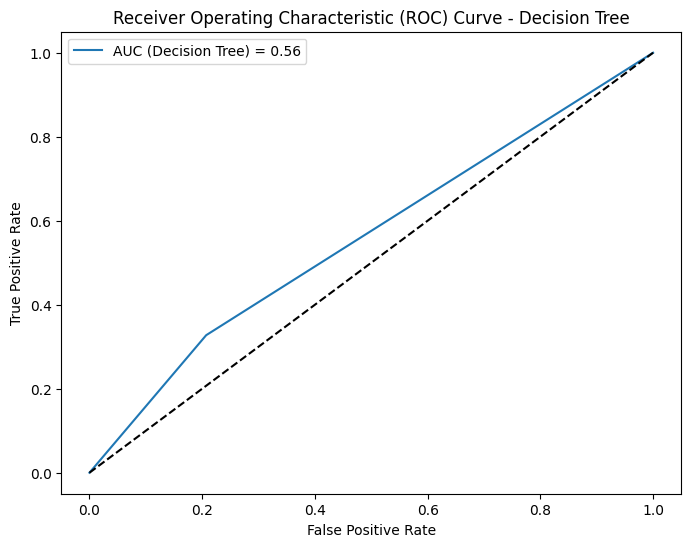

AUC-ROC Score (Decision Tree): 0.5601769911504425


In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model to the resampled training data
dt_classifier.fit(x_resampled, y_resampled)

# Make predictions on the test data
y_pred_dt = dt_classifier.predict(x_test)

# Evaluate the Decision Tree model
print("\nConfusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))

# Predict probabilities for the positive class
y_prob_dt = dt_classifier.predict_proba(x_test)[:, 1]

# Calculate AUC-ROC curve and score for Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

# Plot the ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {roc_auc_dt:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend()
plt.show()

# Print AUC score for Decision Tree
print("AUC-ROC Score (Decision Tree):", roc_auc_dt)


Confusion Matrix (Decision Tree):
 [[438 127]
 [ 73  40]]

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.86      0.78      0.81       565
           1       0.24      0.35      0.29       113

    accuracy                           0.71       678
   macro avg       0.55      0.56      0.55       678
weighted avg       0.75      0.71      0.73       678



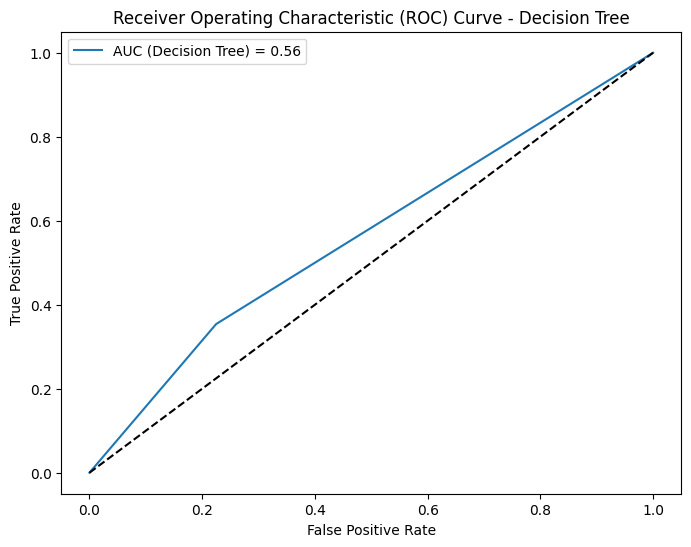

AUC-ROC Score (Decision Tree): 0.5646017699115045


In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model to the polynomial features of the resampled training data
dt_classifier.fit(x_resampled_poly, y_resampled)

# Make predictions on the test data
y_pred_dt = dt_classifier.predict(x_test_poly)

# Evaluate the Decision Tree model
print("\nConfusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))

# Predict probabilities for the positive class
y_prob_dt = dt_classifier.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

# Plot the ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {roc_auc_dt:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend()
plt.show()

# Print AUC score for Decision Tree
print("AUC-ROC Score (Decision Tree):", roc_auc_dt)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}

Confusion Matrix (Tuned Decision Tree):
 [[444 121]
 [ 80  33]]

Classification Report (Tuned Decision Tree):
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       565
           1       0.21      0.29      0.25       113

    accuracy                           0.70       678
   macro avg       0.53      0.54      0.53       678
weighted avg       0.74      0.70      0.72       678



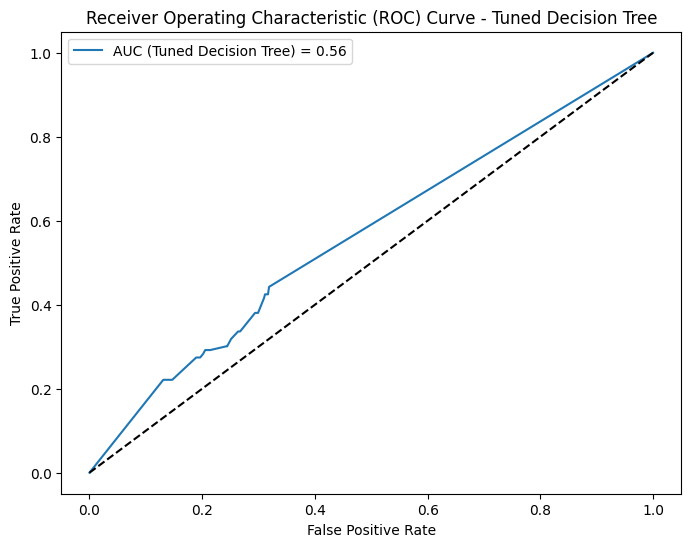

AUC-ROC Score (Tuned Decision Tree): 0.5629258360090845


In [107]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model to the polynomial features of the resampled training data
grid_search.fit(x_resampled_poly, y_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_dt_classifier = grid_search.best_estimator_

# Make predictions on the test data
y_pred_dt_tuned = best_dt_classifier.predict(x_test_poly)

# Evaluate the tuned Decision Tree model
print("\nConfusion Matrix (Tuned Decision Tree):\n", confusion_matrix(y_test, y_pred_dt_tuned))
print("\nClassification Report (Tuned Decision Tree):\n", classification_report(y_test, y_pred_dt_tuned))

# Predict probabilities for the positive class
y_prob_dt_tuned = best_dt_classifier.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for tuned Decision Tree
fpr_dt_tuned, tpr_dt_tuned, thresholds_dt_tuned = roc_curve(y_test, y_prob_dt_tuned)
roc_auc_dt_tuned = roc_auc_score(y_test, y_prob_dt_tuned)

# Plot the ROC curve for tuned Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt_tuned, tpr_dt_tuned, label=f'AUC (Tuned Decision Tree) = {roc_auc_dt_tuned:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Tuned Decision Tree')
plt.legend()
plt.show()

# Print AUC score for tuned Decision Tree
print("AUC-ROC Score (Tuned Decision Tree):", roc_auc_dt_tuned)

### Model 3 - Random foresst Classifier


Confusion Matrix (Random Forest):
 [[505  60]
 [ 87  26]]

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       565
           1       0.30      0.23      0.26       113

    accuracy                           0.78       678
   macro avg       0.58      0.56      0.57       678
weighted avg       0.76      0.78      0.77       678



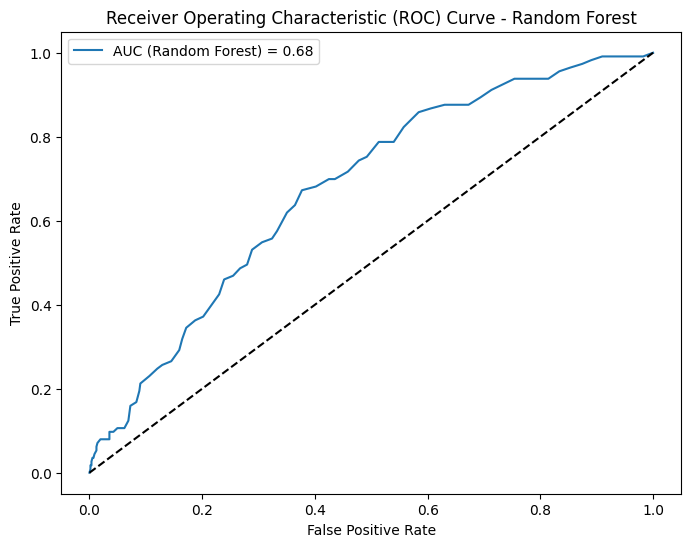

AUC-ROC Score (Random Forest): 0.677077296577649


In [108]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to the polynomial features of the resampled training data
rf_classifier.fit(x_resampled_poly, y_resampled)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(x_test_poly)

# Evaluate the Random Forest model
print("\nConfusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# Predict probabilities for the positive class
y_prob_rf = rf_classifier.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot the ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forest) = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend()
plt.show()

# Print AUC score for Random Forest
print("AUC-ROC Score (Random Forest):", roc_auc_rf)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}

Confusion Matrix (Random Forest - Tuned):
 [[497  68]
 [ 83  30]]

Classification Report (Random Forest - Tuned):
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       565
           1       0.31      0.27      0.28       113

    accuracy                           0.78       678
   macro avg       0.58      0.57      0.58       678
weighted avg       0.77      0.78      0.77       678



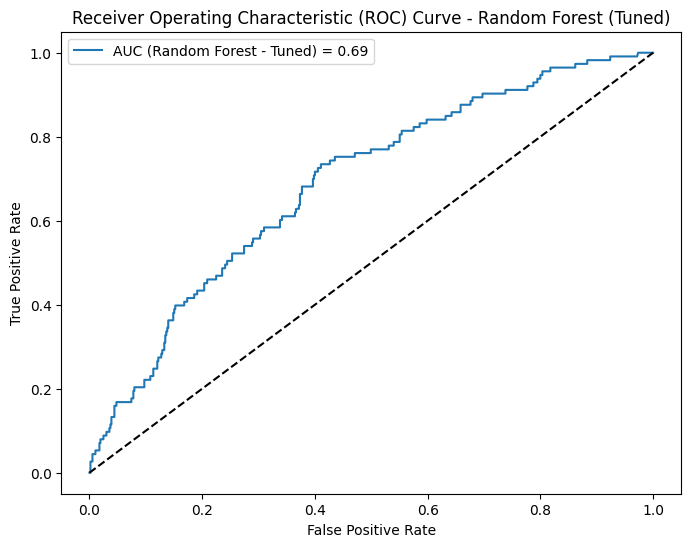

AUC-ROC Score (Random Forest - Tuned): 0.6884720808207377


In [109]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100,150],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2,3]
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='roc_auc')

# Fit the model to the polynomial features of the resampled training data
grid_search.fit(x_resampled_poly, y_resampled)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Make predictions on the test data using the best estimator
y_pred_rf_tuned = best_estimator.predict(x_test_poly)

# Evaluate the Random Forest model with hyperparameter tuning
print("\nConfusion Matrix (Random Forest - Tuned):\n", confusion_matrix(y_test, y_pred_rf_tuned))
print("\nClassification Report (Random Forest - Tuned):\n", classification_report(y_test, y_pred_rf_tuned))

# Predict probabilities for the positive class
y_prob_rf_tuned = best_estimator.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for Random Forest with hyperparameter tuning
fpr_rf_tuned, tpr_rf_tuned, thresholds_rf_tuned = roc_curve(y_test, y_prob_rf_tuned)
roc_auc_rf_tuned = roc_auc_score(y_test, y_prob_rf_tuned)

# Plot the ROC curve for Random Forest with hyperparameter tuning
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_tuned, tpr_rf_tuned, label=f'AUC (Random Forest - Tuned) = {roc_auc_rf_tuned:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest (Tuned)')
plt.legend()
plt.show()

# Print AUC score for Random Forest with hyperparameter tuning
print("AUC-ROC Score (Random Forest - Tuned):", roc_auc_rf_tuned)


Confusion Matrix (Elastic Net):
 [[565   0]
 [113   0]]

Classification Report (Elastic Net):
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       565
           1       0.00      0.00      0.00       113

    accuracy                           0.83       678
   macro avg       0.42      0.50      0.45       678
weighted avg       0.69      0.83      0.76       678



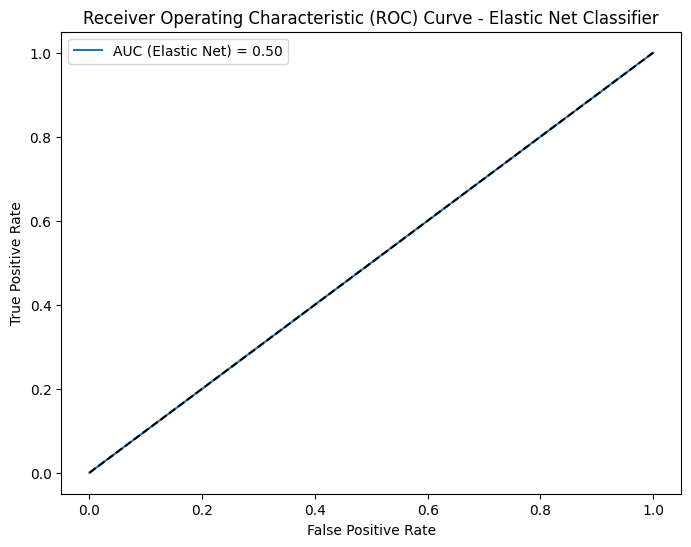

AUC-ROC Score (Elastic Net): 0.5


In [113]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create an Elastic Net Classifier
elastic_net_classifier = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)

# Fit the model to the polynomial features of the resampled training data
elastic_net_classifier.fit(x_resampled_poly, y_resampled)

# Make predictions on the test data
y_pred_elastic_net = elastic_net_classifier.predict(x_test_poly)
y_pred_elastic_net_binary = (y_pred_elastic_net > 0.5).astype(int)  # Adjust threshold if needed

# Evaluate the Elastic Net Classifier
print("\nConfusion Matrix (Elastic Net):\n", confusion_matrix(y_test, y_pred_elastic_net_binary))
print("\nClassification Report (Elastic Net):\n", classification_report(y_test, y_pred_elastic_net_binary))

# Predict probabilities for the positive class
y_prob_elastic_net = elastic_net_classifier.predict(x_test_poly)

# Calculate AUC-ROC curve and score for Elastic Net Classifier
fpr_elastic_net, tpr_elastic_net, thresholds_elastic_net = roc_curve(y_test, y_prob_elastic_net)
roc_auc_elastic_net = roc_auc_score(y_test, y_prob_elastic_net)

# Plot the ROC curve for Elastic Net Classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr_elastic_net, tpr_elastic_net, label=f'AUC (Elastic Net) = {roc_auc_elastic_net:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Elastic Net Classifier')
plt.legend()
plt.show()

# Print AUC score for Elastic Net Classifier
print("AUC-ROC Score (Elastic Net):", roc_auc_elastic_net)


Best Hyperparameters: {'alpha': 0.001, 'l1_ratio': 0.5}

Confusion Matrix (Best Elastic Net Classifier):
 [[581   0]
 [ 96   1]]

Classification Report (Best Elastic Net Classifier):
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       581
           1       1.00      0.01      0.02        97

    accuracy                           0.86       678
   macro avg       0.93      0.51      0.47       678
weighted avg       0.88      0.86      0.79       678



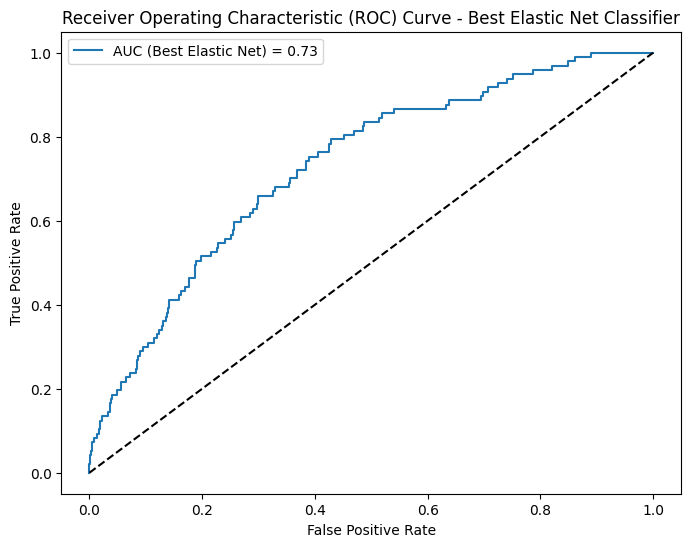

AUC-ROC Score (Best Elastic Net Classifier): 0.7297939918732368


In [115]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have your features (x) and labels (y)
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an Elastic Net Classifier
elastic_net_classifier = ElasticNet(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# Define the scoring metric (AUC-ROC in this case)
scorer = make_scorer(roc_auc_score)

# Create GridSearchCV instance
grid_search = GridSearchCV(elastic_net_classifier, param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best model for predictions
best_elastic_net_classifier = grid_search.best_estimator_
y_pred_best_elastic_net = best_elastic_net_classifier.predict(x_test)
y_pred_best_elastic_net_binary = (y_pred_best_elastic_net > 0.5).astype(int)  # Adjust threshold if needed

# Evaluate the best Elastic Net Classifier
print("\nBest Hyperparameters:", best_params)
print("\nConfusion Matrix (Best Elastic Net Classifier):\n", confusion_matrix(y_test, y_pred_best_elastic_net_binary))
print("\nClassification Report (Best Elastic Net Classifier):\n", classification_report(y_test, y_pred_best_elastic_net_binary))

# Predict probabilities for the positive class
y_prob_best_elastic_net = best_elastic_net_classifier.predict(x_test)

# Calculate AUC-ROC curve and score for the best Elastic Net Classifier
fpr_best_elastic_net, tpr_best_elastic_net, thresholds_best_elastic_net = roc_curve(y_test, y_prob_best_elastic_net)
roc_auc_best_elastic_net = roc_auc_score(y_test, y_prob_best_elastic_net)

# Plot the ROC curve for the best Elastic Net Classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr_best_elastic_net, tpr_best_elastic_net, label=f'AUC (Best Elastic Net) = {roc_auc_best_elastic_net:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Best Elastic Net Classifier')
plt.legend()
plt.show()

# Print AUC score for the best Elastic Net Classifier
print("AUC-ROC Score (Best Elastic Net Classifier):", roc_auc_best_elastic_net)


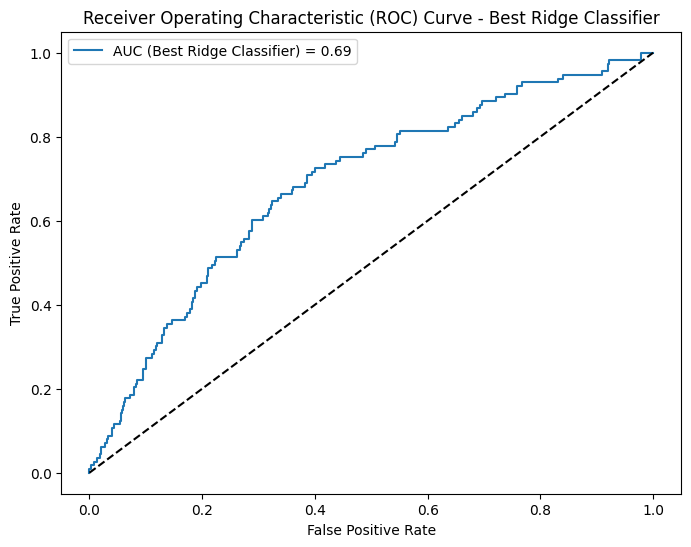


Classification Report (Best Ridge Classifier - Adjusted Threshold):
               precision    recall  f1-score   support

           0       0.91      0.60      0.72       565
           1       0.26      0.72      0.39       113

    accuracy                           0.62       678
   macro avg       0.59      0.66      0.56       678
weighted avg       0.81      0.62      0.67       678



In [112]:
# Assuming you have calculated fpr_best_ridge, tpr_best_ridge, and thresholds_best_ridge
# Plot the ROC curve for the best Ridge Classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr_best_ridge, tpr_best_ridge, label=f'AUC (Best Ridge Classifier) = {roc_auc_best_ridge:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Best Ridge Classifier')
plt.legend()
plt.show()

# Adjusting the decision threshold
optimal_threshold_index = np.argmax(tpr_best_ridge - fpr_best_ridge)
optimal_threshold = thresholds_best_ridge[optimal_threshold_index]

# Apply the adjusted threshold to get new predictions
y_pred_threshold_adjusted = (y_prob_best_ridge > optimal_threshold).astype(int)

# Evaluate the model with the adjusted threshold
print("\nClassification Report (Best Ridge Classifier - Adjusted Threshold):\n", classification_report(y_test, y_pred_threshold_adjusted))



Best Hyperparameters: {'alpha': 0.01, 'solver': 'auto'}

Confusion Matrix (Best Ridge Classifier):
 [[391 174]
 [ 45  68]]

Classification Report (Best Ridge Classifier):
               precision    recall  f1-score   support

           0       0.90      0.69      0.78       565
           1       0.28      0.60      0.38       113

    accuracy                           0.68       678
   macro avg       0.59      0.65      0.58       678
weighted avg       0.79      0.68      0.71       678



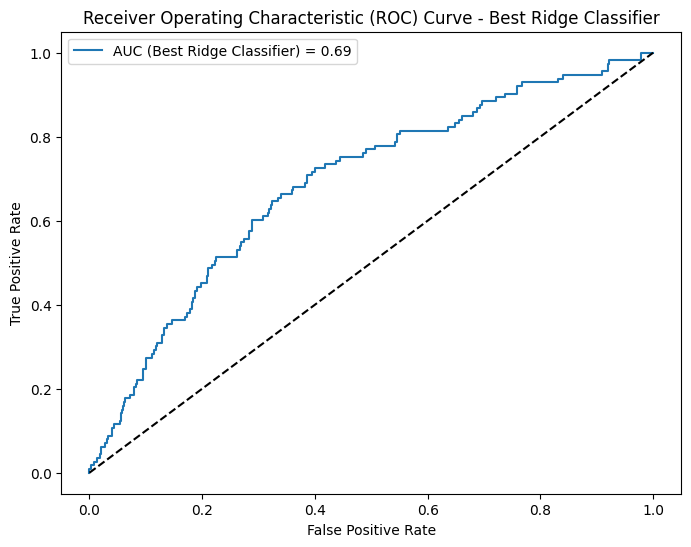

AUC-ROC Score (Best Ridge Classifier): 0.6868353042524865


In [111]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import make_scorer, roc_auc_score

# Create a Ridge Classifier
ridge_classifier = RidgeClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Use StratifiedKFold for cross-validation (suitable for imbalanced datasets)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metric (AUC-ROC in this case)
scorer = make_scorer(roc_auc_score)

# Create GridSearchCV instance
grid_search = GridSearchCV(ridge_classifier, param_grid, scoring=scorer, cv=cv, n_jobs=-1)

# Fit the model to the polynomial features of the resampled training data
grid_search.fit(x_resampled_poly, y_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best model for predictions
best_ridge_classifier = grid_search.best_estimator_
y_pred_best_ridge = best_ridge_classifier.predict(x_test_poly)

# Evaluate the best Ridge Classifier
print("\nBest Hyperparameters:", best_params)
print("\nConfusion Matrix (Best Ridge Classifier):\n", confusion_matrix(y_test, y_pred_best_ridge))
print("\nClassification Report (Best Ridge Classifier):\n", classification_report(y_test, y_pred_best_ridge))

# Predict probabilities for the positive class
y_prob_best_ridge = best_ridge_classifier.decision_function(x_test_poly)

# Calculate AUC-ROC curve and score for the best Ridge Classifier
fpr_best_ridge, tpr_best_ridge, thresholds_best_ridge = roc_curve(y_test, y_prob_best_ridge)
roc_auc_best_ridge = roc_auc_score(y_test, y_prob_best_ridge)

# Plot the ROC curve for the best Ridge Classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr_best_ridge, tpr_best_ridge, label=f'AUC (Best Ridge Classifier) = {roc_auc_best_ridge:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Best Ridge Classifier')
plt.legend()
plt.show()

# Print AUC score for the best Ridge Classifier
print("AUC-ROC Score (Best Ridge Classifier):", roc_auc_best_ridge)


### Model 4 - AdaBoost with polynomial Feature


Confusion Matrix (AdaBoost):
 [[381 184]
 [ 50  63]]

Classification Report (AdaBoost):
               precision    recall  f1-score   support

           0       0.88      0.67      0.77       565
           1       0.26      0.56      0.35       113

    accuracy                           0.65       678
   macro avg       0.57      0.62      0.56       678
weighted avg       0.78      0.65      0.70       678



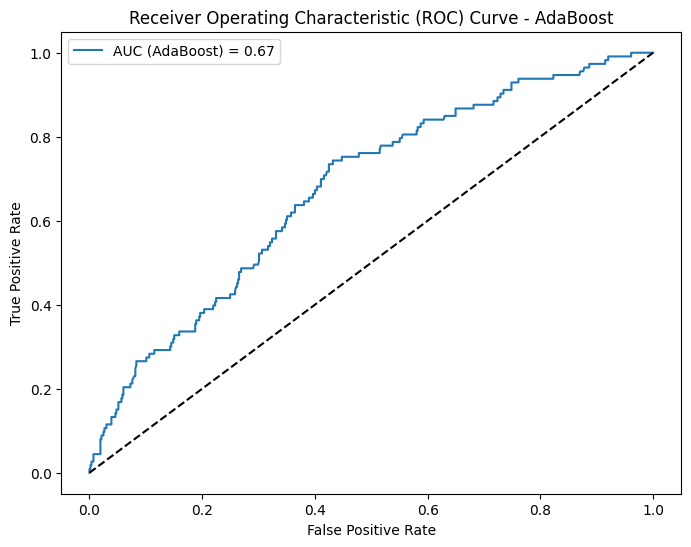

AUC-ROC Score (AdaBoost): 0.6749784634662072


In [1013]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create an AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Fit the model to the resampled training data
adaboost_classifier.fit(x_resampled, y_resampled)

# Make predictions on the test data
y_pred_adaboost = adaboost_classifier.predict(x_test)

# Evaluate the AdaBoost model
print("\nConfusion Matrix (AdaBoost):\n", confusion_matrix(y_test, y_pred_adaboost))
print("\nClassification Report (AdaBoost):\n", classification_report(y_test, y_pred_adaboost))

# Predict probabilities for the positive class
y_prob_adaboost = adaboost_classifier.predict_proba(x_test)[:, 1]

# Calculate AUC-ROC curve and score for AdaBoost
fpr_adaboost, tpr_adaboost, thresholds_adaboost = roc_curve(y_test, y_prob_adaboost)
roc_auc_adaboost = roc_auc_score(y_test, y_prob_adaboost)

# Plot the ROC curve for AdaBoost
plt.figure(figsize=(8, 6))
plt.plot(fpr_adaboost, tpr_adaboost, label=f'AUC (AdaBoost) = {roc_auc_adaboost:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - AdaBoost')
plt.legend()
plt.show()

# Print AUC score for AdaBoost
print("AUC-ROC Score (AdaBoost):", roc_auc_adaboost)

In [729]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create an AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Fit the model to the polynomial features of the resampled training data
adaboost_classifier.fit(x_resampled_poly, y_resampled)

# Make predictions on the test data
y_pred_adaboost = adaboost_classifier.predict(x_test_poly)

# Evaluate the AdaBoost model
print("\nConfusion Matrix (AdaBoost):\n", confusion_matrix(y_test, y_pred_adaboost))
print("\nClassification Report (AdaBoost):\n", classification_report(y_test, y_pred_adaboost))

# Predict probabilities for the positive class
y_prob_adaboost = adaboost_classifier.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for AdaBoost
fpr_adaboost, tpr_adaboost, thresholds_adaboost = roc_curve(y_test, y_prob_adaboost)
roc_auc_adaboost = roc_auc_score(y_test, y_prob_adaboost)

# Plot the ROC curve for AdaBoost
plt.figure(figsize=(8, 6))
plt.plot(fpr_adaboost, tpr_adaboost, label=f'AUC (AdaBoost) = {roc_auc_adaboost:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - AdaBoost')
plt.legend()
plt.show()

# Print AUC score for AdaBoost
print("AUC-ROC Score (AdaBoost):", roc_auc_adaboost)

ValueError: ignored

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 200}
Best AUC Score: 0.7875447303084191

Confusion Matrix (Best AdaBoost):
 [[386 179]
 [ 61  52]]

Classification Report (Best AdaBoost):
               precision    recall  f1-score   support

           0       0.86      0.68      0.76       565
           1       0.23      0.46      0.30       113

    accuracy                           0.65       678
   macro avg       0.54      0.57      0.53       678
weighted avg       0.76      0.65      0.69       678



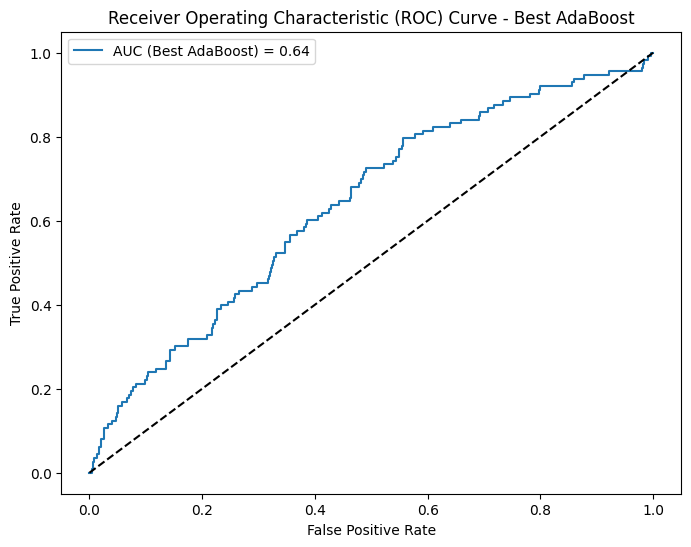

AUC-ROC Score (Best AdaBoost): 0.6375597149346073


In [273]:
from sklearn.model_selection import GridSearchCV

# Define the AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='roc_auc')

# Fit the GridSearchCV object to the data
grid_search.fit(x_resampled_poly, y_resampled)

# Print the best parameters and the corresponding AUC score
print("Best Parameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)

# Get the best model from the grid search
best_adaboost_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred_best_adaboost = best_adaboost_model.predict(x_test_poly)

# Evaluate the best AdaBoost model
print("\nConfusion Matrix (Best AdaBoost):\n", confusion_matrix(y_test, y_pred_best_adaboost))
print("\nClassification Report (Best AdaBoost):\n", classification_report(y_test, y_pred_best_adaboost))

# Predict probabilities for the positive class
y_prob_best_adaboost = best_adaboost_model.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for the best AdaBoost model
fpr_best_adaboost, tpr_best_adaboost, thresholds_best_adaboost = roc_curve(y_test, y_prob_best_adaboost)
roc_auc_best_adaboost = roc_auc_score(y_test, y_prob_best_adaboost)

# Plot the ROC curve for the best AdaBoost model
plt.figure(figsize=(8, 6))
plt.plot(fpr_best_adaboost, tpr_best_adaboost, label=f'AUC (Best AdaBoost) = {roc_auc_best_adaboost:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Best AdaBoost')
plt.legend()
plt.show()

# Print AUC score for the best AdaBoost model
print("AUC-ROC Score (Best AdaBoost):", roc_auc_best_adaboost)

### Gradient Boosting classifier with polynomial features


Confusion Matrix (Gradient Boosting):
 [[382 183]
 [ 48  65]]

Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.89      0.68      0.77       565
           1       0.26      0.58      0.36       113

    accuracy                           0.66       678
   macro avg       0.58      0.63      0.56       678
weighted avg       0.78      0.66      0.70       678



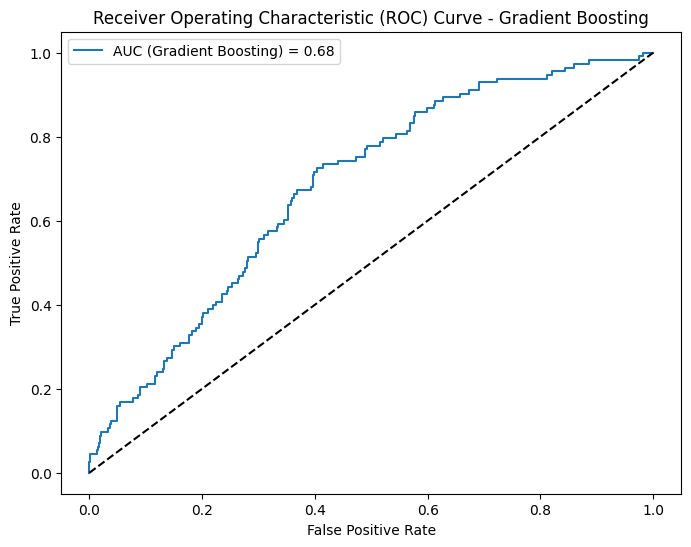

AUC-ROC Score (Gradient Boosting): 0.6817291878768894


In [730]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create a Gradient Boosting Classifier
gradient_boost_classifier = GradientBoostingClassifier(random_state=42)

# Fit the model to the resampled training data
gradient_boost_classifier.fit(x_resampled, y_resampled)

# Make predictions on the test data
y_pred_gradient_boost = gradient_boost_classifier.predict(x_test)

# Evaluate the Gradient Boosting model
print("\nConfusion Matrix (Gradient Boosting):\n", confusion_matrix(y_test, y_pred_gradient_boost))
print("\nClassification Report (Gradient Boosting):\n", classification_report(y_test, y_pred_gradient_boost))

# Predict probabilities for the positive class
y_prob_gradient_boost = gradient_boost_classifier.predict_proba(x_test)[:, 1]

# Calculate AUC-ROC curve and score for Gradient Boosting
fpr_gradient_boost, tpr_gradient_boost, thresholds_gradient_boost = roc_curve(y_test, y_prob_gradient_boost)
roc_auc_gradient_boost = roc_auc_score(y_test, y_prob_gradient_boost)

# Plot the ROC curve for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.plot(fpr_gradient_boost, tpr_gradient_boost, label=f'AUC (Gradient Boosting) = {roc_auc_gradient_boost:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting')
plt.legend()
plt.show()

# Print AUC score for Gradient Boosting
print("AUC-ROC Score (Gradient Boosting):", roc_auc_gradient_boost)


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}

Confusion Matrix (Best Gradient Boosting Model):
 [[440 125]
 [ 72  41]]

Classification Report (Best Gradient Boosting Model):
               precision    recall  f1-score   support

           0       0.86      0.78      0.82       565
           1       0.25      0.36      0.29       113

    accuracy                           0.71       678
   macro avg       0.55      0.57      0.56       678
weighted avg       0.76      0.71      0.73       678



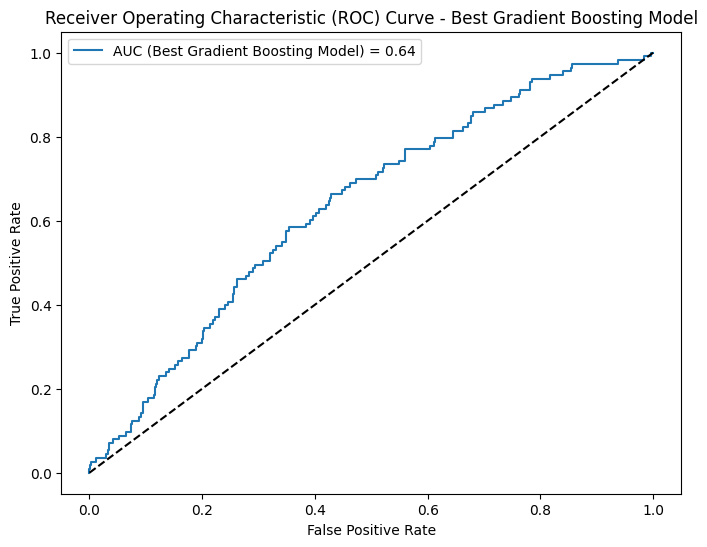

AUC-ROC Score (Best Gradient Boosting Model): 0.6361970397055369


In [519]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Create a Gradient Boosting Classifier
gradient_boost_classifier = GradientBoostingClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(gradient_boost_classifier, param_grid, cv=5, scoring='roc_auc')

# Fit the GridSearchCV object to the resampled training data
grid_search.fit(x_resampled, y_resampled)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_gradient_boost_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred_best_model = best_gradient_boost_model.predict(x_test)

# Evaluate the best model
print("\nConfusion Matrix (Best Gradient Boosting Model):\n", confusion_matrix(y_test, y_pred_best_model))
print("\nClassification Report (Best Gradient Boosting Model):\n", classification_report(y_test, y_pred_best_model))

# Predict probabilities for the positive class using the best model
y_prob_best_model = best_gradient_boost_model.predict_proba(x_test)[:, 1]

# Calculate AUC-ROC curve and score for the best model
fpr_best_model, tpr_best_model, thresholds_best_model = roc_curve(y_test, y_prob_best_model)
roc_auc_best_model = roc_auc_score(y_test, y_prob_best_model)

# Plot the ROC curve for the best model
plt.figure(figsize=(8, 6))
plt.plot(fpr_best_model, tpr_best_model, label=f'AUC (Best Gradient Boosting Model) = {roc_auc_best_model:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Best Gradient Boosting Model')
plt.legend()
plt.show()

# Print AUC score for the best model
print("AUC-ROC Score (Best Gradient Boosting Model):", roc_auc_best_model)



Confusion Matrix (Gradient Boosting):
 [[405 160]
 [ 59  54]]

Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.87      0.72      0.79       565
           1       0.25      0.48      0.33       113

    accuracy                           0.68       678
   macro avg       0.56      0.60      0.56       678
weighted avg       0.77      0.68      0.71       678



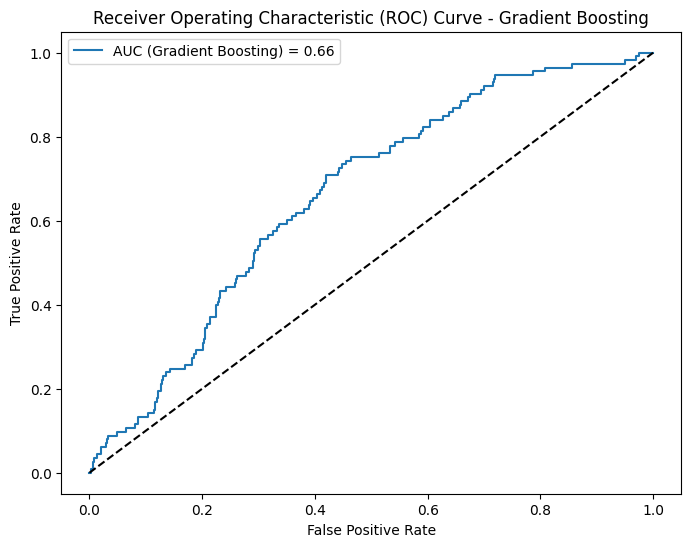

AUC-ROC Score (Gradient Boosting): 0.6614143629101731


In [274]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)

# Fit the model to the polynomial features of the resampled training data
gb_classifier.fit(x_resampled_poly, y_resampled)

# Make predictions on the test data
y_pred_gb = gb_classifier.predict(x_test_poly)

# Evaluate the Gradient Boosting model
print("\nConfusion Matrix (Gradient Boosting):\n", confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report (Gradient Boosting):\n", classification_report(y_test, y_pred_gb))

# Predict probabilities for the positive class
y_prob_gb = gb_classifier.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for Gradient Boosting
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)

# Plot the ROC curve for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label=f'AUC (Gradient Boosting) = {roc_auc_gb:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting')
plt.legend()
plt.show()

# Print AUC score for Gradient Boosting
print("AUC-ROC Score (Gradient Boosting):", roc_auc_gb)

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 100}
Best AUC Score: 0.8625355845530134

Confusion Matrix (Best Gradient Boosting):
 [[449 116]
 [ 73  40]]

Classification Report (Best Gradient Boosting):
               precision    recall  f1-score   support

           0       0.86      0.79      0.83       565
           1       0.26      0.35      0.30       113

    accuracy                           0.72       678
   macro avg       0.56      0.57      0.56       678
weighted avg       0.76      0.72      0.74       678



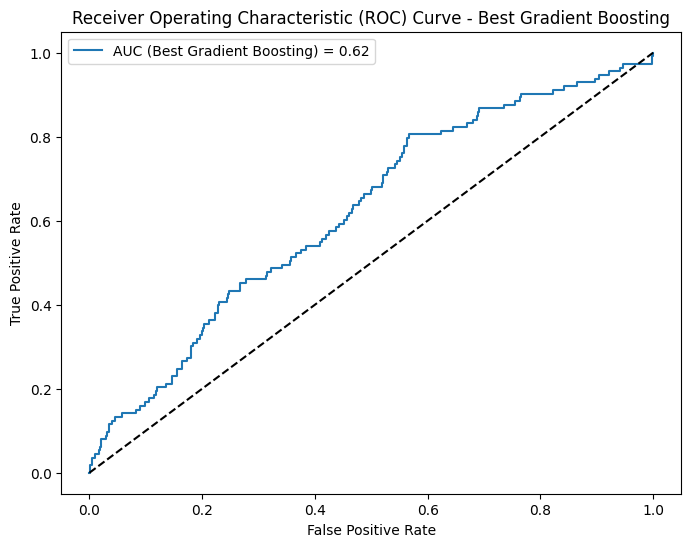

AUC-ROC Score (Best Gradient Boosting): 0.6207533871094055


In [275]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Create the GridSearchCV object
grid_search_gb = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='roc_auc')

# Fit the GridSearchCV object to the data
grid_search_gb.fit(x_resampled_poly, y_resampled)

# Print the best parameters and the corresponding AUC score
print("Best Parameters:", grid_search_gb.best_params_)
print("Best AUC Score:", grid_search_gb.best_score_)

# Get the best model from the grid search
best_gb_model = grid_search_gb.best_estimator_

# Make predictions on the test data
y_pred_best_gb = best_gb_model.predict(x_test_poly)

# Evaluate the best Gradient Boosting model
print("\nConfusion Matrix (Best Gradient Boosting):\n", confusion_matrix(y_test, y_pred_best_gb))
print("\nClassification Report (Best Gradient Boosting):\n", classification_report(y_test, y_pred_best_gb))

# Predict probabilities for the positive class
y_prob_best_gb = best_gb_model.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for the best Gradient Boosting model
fpr_best_gb, tpr_best_gb, thresholds_best_gb = roc_curve(y_test, y_prob_best_gb)
roc_auc_best_gb = roc_auc_score(y_test, y_prob_best_gb)

# Plot the ROC curve for the best Gradient Boosting model
plt.figure(figsize=(8, 6))
plt.plot(fpr_best_gb, tpr_best_gb, label=f'AUC (Best Gradient Boosting) = {roc_auc_best_gb:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Best Gradient Boosting')
plt.legend()
plt.show()

# Print AUC score for the best Gradient Boosting model
print("AUC-ROC Score (Best Gradient Boosting):", roc_auc_best_gb)


### XGB BOOST MODEL WITH POLYNOMIAL FEATURES


Confusion Matrix (XGBoost):
 [[401 164]
 [ 58  55]]

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.87      0.71      0.78       565
           1       0.25      0.49      0.33       113

    accuracy                           0.67       678
   macro avg       0.56      0.60      0.56       678
weighted avg       0.77      0.67      0.71       678



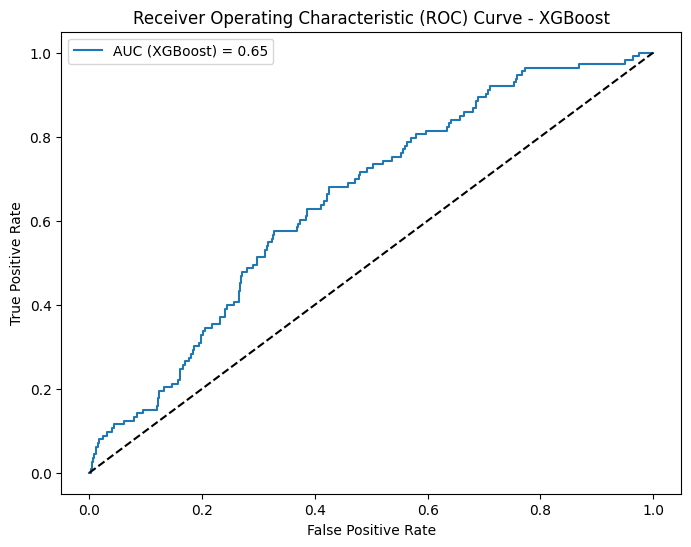

AUC-ROC Score (XGBoost): 0.6485707573028429


In [276]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create an XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)

# Fit the model to the polynomial features of the resampled training data
xgb_classifier.fit(x_resampled_poly, y_resampled)

# Make predictions on the test data
y_pred_xgb = xgb_classifier.predict(x_test_poly)

# Evaluate the XGBoost model
print("\nConfusion Matrix (XGBoost):\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))

# Predict probabilities for the positive class
y_prob_xgb = xgb_classifier.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# Plot the ROC curve for XGBoost
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'AUC (XGBoost) = {roc_auc_xgb:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend()
plt.show()

# Print AUC score for XGBoost
print("AUC-ROC Score (XGBoost):", roc_auc_xgb)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}

Confusion Matrix (Tuned XGBoost):
 [[476  89]
 [ 81  32]]

Classification Report (Tuned XGBoost):
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       565
           1       0.26      0.28      0.27       113

    accuracy                           0.75       678
   macro avg       0.56      0.56      0.56       678
weighted avg       0.76      0.75      0.75       678



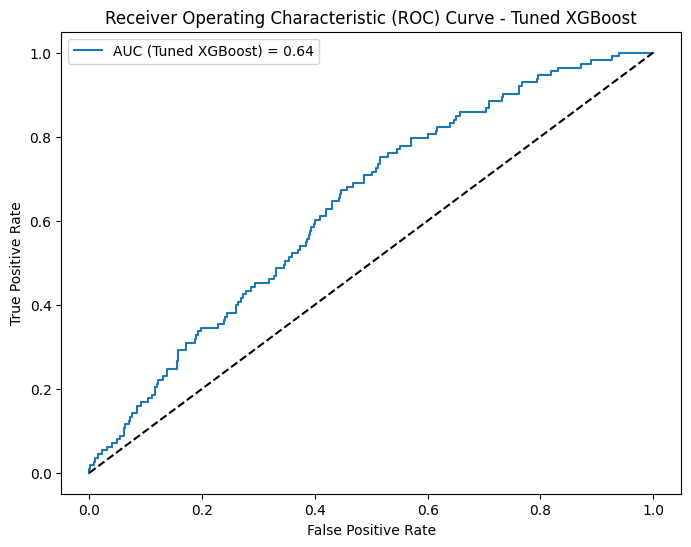

AUC-ROC Score (Tuned XGBoost): 0.6365729501135562


In [277]:
from sklearn.model_selection import GridSearchCV

# Define the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100,150,200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5,7]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1)

# Fit the model to the resampled training data
grid_search.fit(x_resampled_poly, y_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test data using the best model
y_pred_xgb_tuned = grid_search.predict(x_test_poly)

# Evaluate the tuned XGBoost model
print("\nConfusion Matrix (Tuned XGBoost):\n", confusion_matrix(y_test, y_pred_xgb_tuned))
print("\nClassification Report (Tuned XGBoost):\n", classification_report(y_test, y_pred_xgb_tuned))

# Predict probabilities for the positive class using the best model
y_prob_xgb_tuned = grid_search.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for Tuned XGBoost
fpr_xgb_tuned, tpr_xgb_tuned, thresholds_xgb_tuned = roc_curve(y_test, y_prob_xgb_tuned)
roc_auc_xgb_tuned = roc_auc_score(y_test, y_prob_xgb_tuned)

# Plot the ROC curve for Tuned XGBoost
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb_tuned, tpr_xgb_tuned, label=f'AUC (Tuned XGBoost) = {roc_auc_xgb_tuned:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Tuned XGBoost')
plt.legend()
plt.show()

# Print AUC score for Tuned XGBoost
print("AUC-ROC Score (Tuned XGBoost):", roc_auc_xgb_tuned)


### ML Model - 7 KNN with Polynomial Feature


Confusion Matrix (KNN):
 [[376 189]
 [ 58  55]]

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.87      0.67      0.75       565
           1       0.23      0.49      0.31       113

    accuracy                           0.64       678
   macro avg       0.55      0.58      0.53       678
weighted avg       0.76      0.64      0.68       678



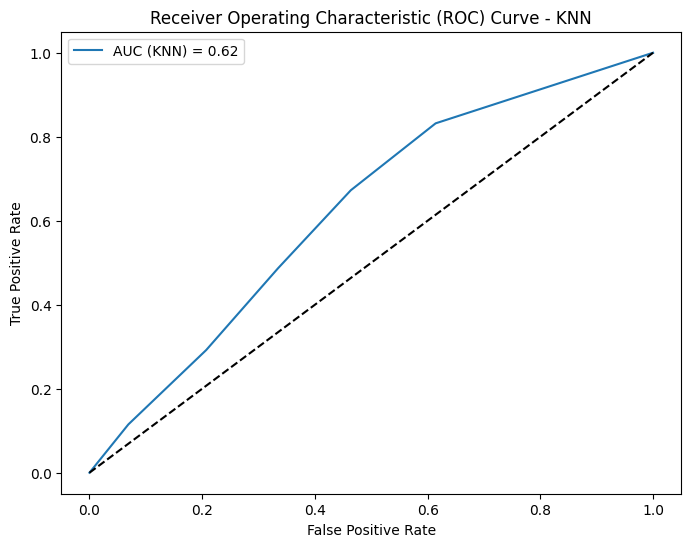

AUC-ROC Score (KNN): 0.6231498159605294


In [278]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create a K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()

# Fit the model to the polynomial features of the resampled training data
knn_classifier.fit(x_resampled_poly, y_resampled)

# Make predictions on the test data
y_pred_knn = knn_classifier.predict(x_test_poly)

# Evaluate the KNN model
print("\nConfusion Matrix (KNN):\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report (KNN):\n", classification_report(y_test, y_pred_knn))

# Predict probabilities for the positive class
y_prob_knn = knn_classifier.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

# Plot the ROC curve for KNN
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'AUC (KNN) = {roc_auc_knn:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend()
plt.show()

# Print AUC score for KNN
print("AUC-ROC Score (KNN):", roc_auc_knn)

Best Hyperparameters: {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}

Confusion Matrix (Tuned KNN):
 [[374 191]
 [ 58  55]]

Classification Report (Tuned KNN):
               precision    recall  f1-score   support

           0       0.87      0.66      0.75       565
           1       0.22      0.49      0.31       113

    accuracy                           0.63       678
   macro avg       0.54      0.57      0.53       678
weighted avg       0.76      0.63      0.68       678



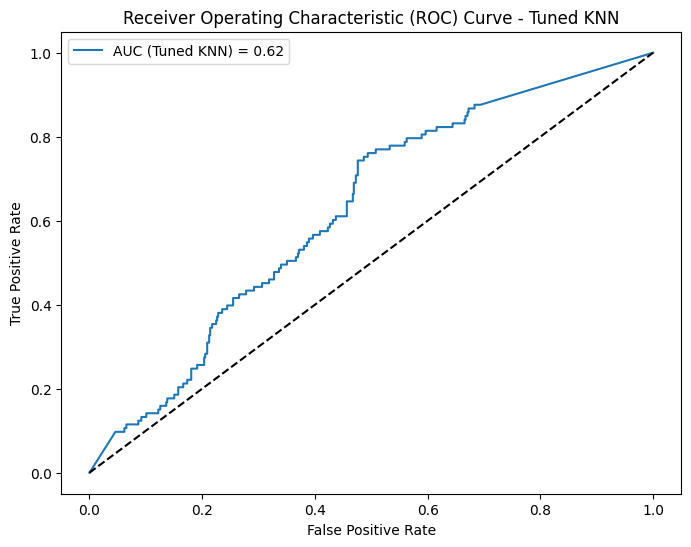

AUC-ROC Score (Tuned KNN): 0.6243245359855901


In [279]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Adjust these values based on your needs
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create a K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()

# Create a GridSearchCV instance
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='roc_auc')

# Fit the GridSearchCV to the polynomial features of the resampled training data
grid_search.fit(x_resampled_poly, y_resampled)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best KNN model from the grid search
best_knn_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred_knn_tuned = best_knn_model.predict(x_test_poly)

# Evaluate the tuned KNN model
print("\nConfusion Matrix (Tuned KNN):\n", confusion_matrix(y_test, y_pred_knn_tuned))
print("\nClassification Report (Tuned KNN):\n", classification_report(y_test, y_pred_knn_tuned))

# Predict probabilities for the positive class
y_prob_knn_tuned = best_knn_model.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for tuned KNN
fpr_knn_tuned, tpr_knn_tuned, thresholds_knn_tuned = roc_curve(y_test, y_prob_knn_tuned)
roc_auc_knn_tuned = roc_auc_score(y_test, y_prob_knn_tuned)

# Plot the ROC curve for tuned KNN
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn_tuned, tpr_knn_tuned, label=f'AUC (Tuned KNN) = {roc_auc_knn_tuned:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Tuned KNN')
plt.legend()
plt.show()

# Print AUC score for tuned KNN
print("AUC-ROC Score (Tuned KNN):", roc_auc_knn_tuned)

### ML Model 7 - Naive Bayes Classifier


Confusion Matrix (Naive Bayes):
 [[478  87]
 [ 90  23]]

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       565
           1       0.21      0.20      0.21       113

    accuracy                           0.74       678
   macro avg       0.53      0.52      0.53       678
weighted avg       0.74      0.74      0.74       678



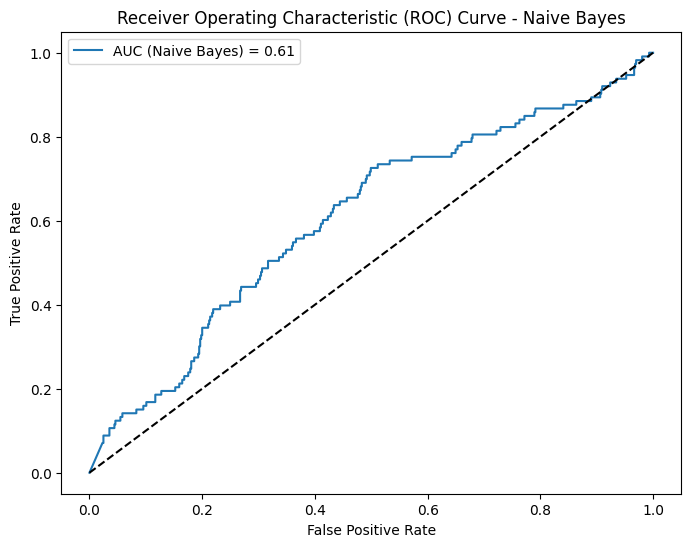

AUC-ROC Score (Naive Bayes): 0.6065314433393375


In [280]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create a Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()

# Fit the model to the polynomial features of the resampled training data
nb_classifier.fit(x_resampled_poly, y_resampled)

# Make predictions on the test data
y_pred_nb = nb_classifier.predict(x_test_poly)

# Evaluate the Naive Bayes model
print("\nConfusion Matrix (Naive Bayes):\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report (Naive Bayes):\n", classification_report(y_test, y_pred_nb))

# Predict probabilities for the positive class
y_prob_nb = nb_classifier.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for Naive Bayes
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)
roc_auc_nb = roc_auc_score(y_test, y_prob_nb)

# Plot the ROC curve for Naive Bayes
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'AUC (Naive Bayes) = {roc_auc_nb:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend()
plt.show()

# Print AUC score for Naive Bayes
print("AUC-ROC Score (Naive Bayes):", roc_auc_nb)

Best Parameters: {'var_smoothing': 0.1}

Confusion Matrix (Naive Bayes - CV):
 [[500  65]
 [ 94  19]]

Classification Report (Naive Bayes - CV):
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       565
           1       0.23      0.17      0.19       113

    accuracy                           0.77       678
   macro avg       0.53      0.53      0.53       678
weighted avg       0.74      0.77      0.75       678



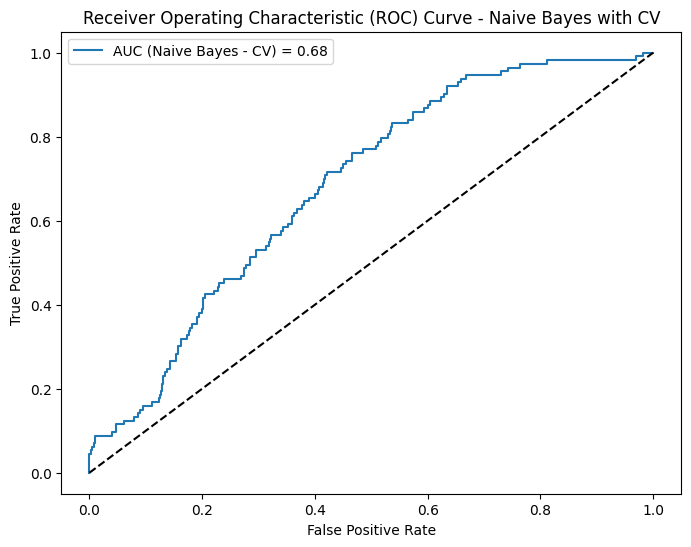

AUC-ROC Score (Naive Bayes - CV): 0.6830762001722923


In [281]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
}

# Create a Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()

# Create GridSearchCV
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, scoring='roc_auc', cv=5)

# Fit the model to the polynomial features of the resampled training data
grid_search.fit(x_resampled_poly, y_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on the test data
y_pred_nb_cv = grid_search.predict(x_test_poly)

# Evaluate the Naive Bayes model with cross-validation and hyperparameter tuning
print("\nConfusion Matrix (Naive Bayes - CV):\n", confusion_matrix(y_test, y_pred_nb_cv))
print("\nClassification Report (Naive Bayes - CV):\n", classification_report(y_test, y_pred_nb_cv))

# Predict probabilities for the positive class
y_prob_nb_cv = grid_search.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for Naive Bayes with cross-validation
fpr_nb_cv, tpr_nb_cv, thresholds_nb_cv = roc_curve(y_test, y_prob_nb_cv)
roc_auc_nb_cv = roc_auc_score(y_test, y_prob_nb_cv)

# Plot the ROC curve for Naive Bayes with cross-validation
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb_cv, tpr_nb_cv, label=f'AUC (Naive Bayes - CV) = {roc_auc_nb_cv:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes with CV')
plt.legend()
plt.show()

# Print AUC score for Naive Bayes with cross-validation
print("AUC-ROC Score (Naive Bayes - CV):", roc_auc_nb_cv)

### Model - Support VECTOR classifier


Confusion Matrix (SVC):
 [[377 188]
 [ 42  71]]

Classification Report (SVC):
               precision    recall  f1-score   support

           0       0.90      0.67      0.77       565
           1       0.27      0.63      0.38       113

    accuracy                           0.66       678
   macro avg       0.59      0.65      0.57       678
weighted avg       0.80      0.66      0.70       678



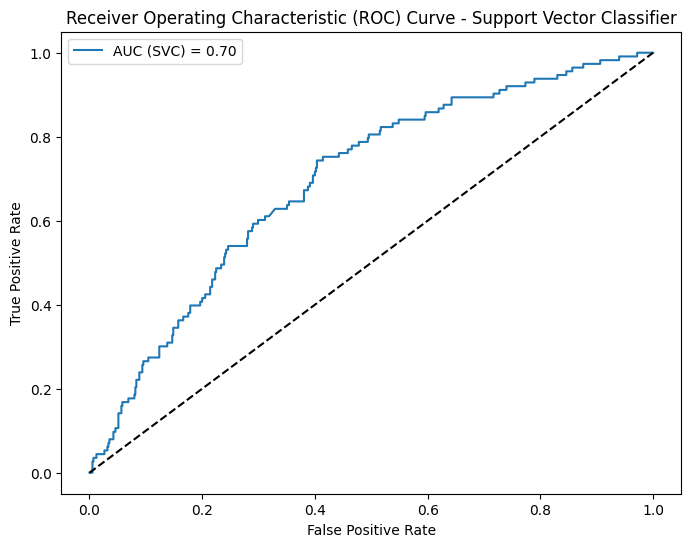

AUC-ROC Score (SVC): 0.6950896702952464


In [282]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create a Support Vector Classifier
svc_classifier = SVC(probability=True, random_state=42)

# Fit the model to the polynomial features of the resampled training data
svc_classifier.fit(x_resampled_poly, y_resampled)

# Make predictions on the test data
y_pred_svc = svc_classifier.predict(x_test_poly)

# Evaluate the Support Vector Classifier
print("\nConfusion Matrix (SVC):\n", confusion_matrix(y_test, y_pred_svc))
print("\nClassification Report (SVC):\n", classification_report(y_test, y_pred_svc))

# Predict probabilities for the positive class
y_prob_svc = svc_classifier.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for Support Vector Classifier
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_prob_svc)
roc_auc_svc = roc_auc_score(y_test, y_prob_svc)

# Plot the ROC curve for Support Vector Classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, label=f'AUC (SVC) = {roc_auc_svc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Support Vector Classifier')
plt.legend()
plt.show()

# Print AUC score for Support Vector Classifier
print("AUC-ROC Score (SVC):", roc_auc_svc)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Confusion Matrix (Tuned SVC):
 [[385 180]
 [ 48  65]]

Classification Report (Tuned SVC):
               precision    recall  f1-score   support

           0       0.89      0.68      0.77       565
           1       0.27      0.58      0.36       113

    accuracy                           0.66       678
   macro avg       0.58      0.63      0.57       678
weighted avg       0.79      0.66      0.70       678



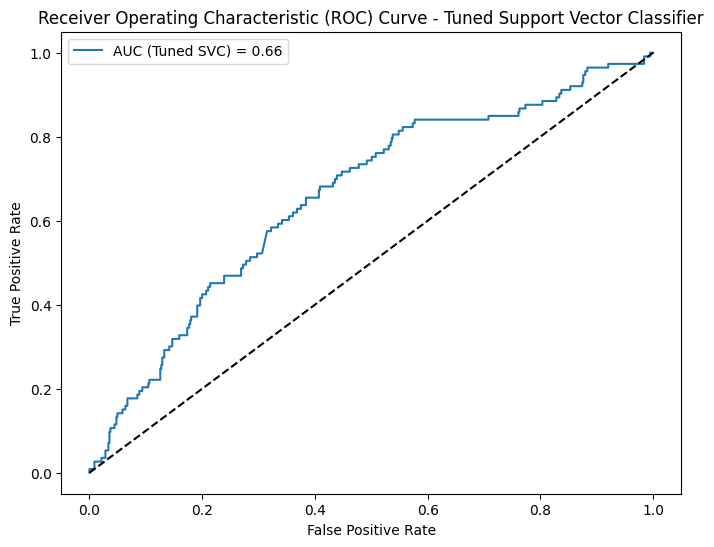

AUC-ROC Score (Tuned SVC): 0.6589396193907119


In [283]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create a Support Vector Classifier
svc_classifier = SVC(probability=True, random_state=42)

# Create a scorer for ROC-AUC
roc_auc_scorer = make_scorer(roc_auc_score)

# Create a GridSearchCV instance
grid_search_svc = GridSearchCV(
    svc_classifier,
    param_grid,
    cv=5,  # Adjust the number of folds as needed
    scoring=roc_auc_scorer
)

# Fit the GridSearchCV to the polynomial features of the resampled training data
grid_search_svc.fit(x_resampled_poly, y_resampled)

# Get the best parameters from the grid search
best_params_svc = grid_search_svc.best_params_
print("Best Parameters:", best_params_svc)

# Make predictions on the test data using the best model from grid search
y_pred_svc_tuned = grid_search_svc.predict(x_test_poly)

# Evaluate the tuned Support Vector Classifier
print("\nConfusion Matrix (Tuned SVC):\n", confusion_matrix(y_test, y_pred_svc_tuned))
print("\nClassification Report (Tuned SVC):\n", classification_report(y_test, y_pred_svc_tuned))

# Predict probabilities for the positive class
y_prob_svc_tuned = grid_search_svc.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for Tuned Support Vector Classifier
fpr_svc_tuned, tpr_svc_tuned, thresholds_svc_tuned = roc_curve(y_test, y_prob_svc_tuned)
roc_auc_svc_tuned = roc_auc_score(y_test, y_prob_svc_tuned)

# Plot the ROC curve for Tuned Support Vector Classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc_tuned, tpr_svc_tuned, label=f'AUC (Tuned SVC) = {roc_auc_svc_tuned:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Tuned Support Vector Classifier')
plt.legend()
plt.show()

# Print AUC score for Tuned Support Vector Classifier
print("AUC-ROC Score (Tuned SVC):", roc_auc_svc_tuned)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***